In [1]:
!pwd
import sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
sys.path.insert(1,'/Users/kate/Tools/')
#from catalog_tools import crossmatch


try:
    from grizli import utils
    utils.set_warnings()
    read_catalog = utils.read_catalog
    print('using grizli')
except:
    from astropy.table import Table
    read_catalog = Table.read
    print('using astropy')

import eazy
print(eazy.__version__)

import os

/Users/clausen/Documents/jupyter/research
using grizli
0.5.2.dev53


In [2]:
sys.path
eazy.__file__

'/opt/miniconda3/envs/grizli/lib/python3.9/site-packages/eazy/__init__.py'

In [3]:
#root = 'path_to_files/c2020'
root = '/Users/clausen/Documents/jupyter/research/Cosmos2021/c2020'

## set up eazy parameters

In [4]:
!pwd


params = {}
params['CATALOG_FILE'] = 'COSMOS2020_FARMER_R1_v2.0.reform.fits' # this is the reformed photometry for eazy 

params['MAIN_OUTPUT_FILE'] = 'x.{0}.eazypy'.format(root)

params['Z_MAX'] = 12
params['Z_STEP'] = 0.005

params['PRIOR_ABZP'] = 23.9
params['PRIOR_FILTER'] = 259

params['MW_EBV'] = 0.017
params['CAT_HAS_EXTCORR'] = False

params['TEMPLATES_FILE'] = 'templates/xspline_templates/corr_sfhz_13.param'

params['MAIN_OUTPUT_FILE'] = 'Farmerv2.0.10.eazypy'

#params['IGM_SCALE_TAU'] = 0.5

params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'
params['TEMP_ERR_FILE'] = 'templates/template_error_cosmos2020.txt'
params['TEMP_ERR_A2'] = 1.
params['SYS_ERR'] = 0.02

params['FILTERS_RES'] = 'FILTER.RES1.latest'

# params['TEMP_ERR_FILE'] = 'templates/flat_tef.txt'
# params['TEMP_ERR_A2'] = 1.
# params['SYS_ERR'] = 0.0

zpfile = None
zpfile = 'zphot.zeropoint.corr'
if not os.path.exists(zpfile):
    zpfile = None
    
print('zpfile: ', zpfile)

load_products = False
translate_file = 'cosmos2020_farmer.translate'
#translate_file = 'cosmos2020_farmer_new.translate'
#translate_file = 'farmer_v051120.full.zphot.translate'
#translate_file = 'test.zphot.translate'
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=zpfile, 
                          params=params, load_prior=True, load_products=load_products)

/Users/clausen/Documents/jupyter/research
zpfile:  zphot.zeropoint.corr
Read default param file: /opt/miniconda3/envs/grizli/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: COSMOS2020_FARMER_R1_v2.0.reform.fits
   >>> NOBJ = 964506
CFHT_ustar_FLUX CFHT_ustar_FLUXERR (408): CFHT-megaprime-u9301-Betoule2013
CFHT_u_FLUX CFHT_u_FLUXERR (409): CFHT-megaprime-u9302-atmos+inst
HSC_g_FLUX HSC_g_FLUXERR (314): g_HSC.txt
HSC_r_FLUX HSC_r_FLUXERR (315): r_HSC.txt
HSC_i_FLUX HSC_i_FLUXERR (316): i_HSC.txt
HSC_z_FLUX HSC_z_FLUXERR (317): z_HSC.txt
HSC_y_FLUX HSC_y_FLUXERR (318): y_HSC.txt
UVISTA_Ks_FLUX UVISTA_Ks_FLUXERR (259): VISTA/Ks_system+atmos.dat
UVISTA_Y_FLUX UVISTA_Y_FLUXERR (256): VISTA/Y_system+atmos.dat
UVISTA_H_FLUX UVISTA_H_FLUXERR (258): VISTA/H_system+atmos.dat
UVISTA_J_FLUX UVISTA_J_FLUXERR (257): VISTA/J_system+atmos.dat
IRAC_CH1_FLUX IRAC_CH1_FLUXERR ( 18): IRAC/irac_tr1_2004-08-09.dat
IRAC_CH2_FLUX IRAC_CH2_FLUXERR ( 19): IRAC/irac_tr2_2004-08-09.dat

100%|███████████████████████████████████████████| 13/13 [00:43<00:00,  3.33s/it]


Template   0: corr_sfhz_13_bin0_av0.01.fits (NZ=14).
Template   1: corr_sfhz_13_bin0_av0.25.fits (NZ=14).
Template   2: corr_sfhz_13_bin0_av0.50.fits (NZ=14).
Template   3: corr_sfhz_13_bin0_av1.00.fits (NZ=14).
Template   4: corr_sfhz_13_bin1_av0.01.fits (NZ=14).
Template   5: corr_sfhz_13_bin1_av0.25.fits (NZ=14).
Template   6: corr_sfhz_13_bin1_av0.50.fits (NZ=14).
Template   7: corr_sfhz_13_bin1_av1.00.fits (NZ=14).
Template   8: corr_sfhz_13_bin2_av0.01.fits (NZ=14).
Template   9: corr_sfhz_13_bin2_av0.50.fits (NZ=14).
Template  10: corr_sfhz_13_bin2_av1.00.fits (NZ=14).
Template  11: corr_sfhz_13_bin3_av0.01.fits (NZ=14).
Template  12: corr_sfhz_13_bin3_av0.50.fits (NZ=14).
Process templates: 44.163 s


511it [05:47,  1.47it/s]


In [5]:
if 'ID' in self.cat.colnames:
    self.cat.rename_column('ID','id')

## Apply spatial offsets

In [6]:
# Apply spatial offsets
#root_offsets = 'path_to_file/Cosmos2021'
root_offsets = '/Users/clausen/Documents/jupyter/research/Cosmos2021/'
import glob, os

xycols=('ALPHA_J2000','DELTA_J2000')
xycols = ('ra', 'dec')

if 'C2020/classic_v1.5' in root_offsets:
    files = glob.glob('aperNovErr.*eazypy*_00[123].npy')    
elif 'farmer_v051120' in root_offsets:
    files = glob.glob('farmerNovErr.*eazypy*FLUX_00[123].npy')
elif 'Cosmos2021' in root_offsets:
    files = glob.glob(root_offsets+'iK.Farmerv2.0.eazypy_*_FLUX.npy')
    print('spatial offsets applied')
    
files.sort()

for file in files:
    
    filename = os.path.basename(file)
    band = '_'.join(filename.split('_')[1:-1])+'_FLUX'
    if band not in self.flux_columns:
        print('not found')
        continue

    _x, ret = np.load(file, allow_pickle=True)
    i, col_i, f_name, msum, min_sn = _x
    if col_i not in self.flux_columns:
        print('Skip ', file)
        continue

    ifilt = self.flux_columns.index(col_i)
    print(file, ifilt, col_i, msum)
    self.apply_spatial_offset(ifilt, ret, xycols=xycols)
    print('spatial offsets applied')

#del(self.spatial_offset)
#self.spatial_offset = None

spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_CFHT_u_FLUX.npy 1 CFHT_u_FLUX 133275
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_CFHT_ustar_FLUX.npy 0 CFHT_ustar_FLUX 143610
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_g_FLUX.npy 2 HSC_g_FLUX 163074
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_i_FLUX.npy 4 HSC_i_FLUX 170266
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_r_FLUX.npy 3 HSC_r_FLUX 167709
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_y_FLUX.npy 6 HSC_y_FLUX 168798
Set sys_err = 0

## Read in zphot and official catalog 

In [7]:
# do star selection here but just best fit templates, not on morphologies 

zoutf = read_catalog('c2020.zout.fits')
officialf = read_catalog('COSMOS2020_FARMER_R1_v2.0.fits')

cat = zoutf
official = officialf

## suggested star galaxy separation - write your own if you prefer! 

stars:  26854 964506
--


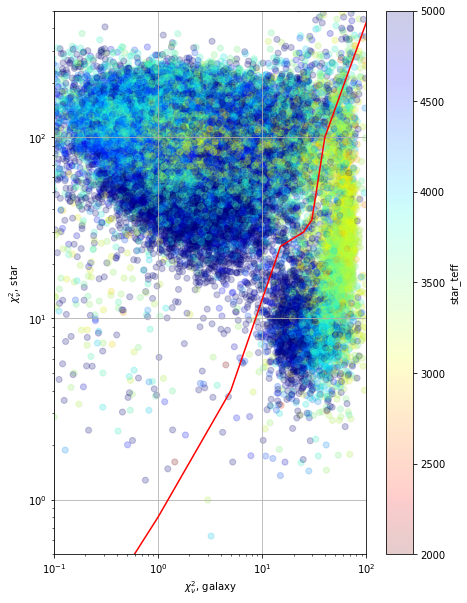

In [8]:
# save output 
# Chi-squared from stellar and galaxy template fits
# nnu = official['nusefilt'][has_hst]-1
# xnu = official['nusefilt']-1

galaxy_chinu = official['ez_z_phot_chi2'] / (official['ez_nusefilt'] - 1)
stellar_chinu = official['ez_star_min_chi2'] / (official['ez_nusefilt'] - 1)


# orig
keep = (official['HSC_i_MAG'] < 22) & (galaxy_chinu < 25) #& (zout['z_spec'] > 0)
# update
keep = (official['HSC_i_MAG'] < 23) & (galaxy_chinu < 100) #& (official['z_spec'] > 0)
ss = official['ez_z_phot']>4.
plt.figure(figsize=(7,10))
plt.scatter(galaxy_chinu[keep], stellar_chinu[keep], 
           color='0.8', alpha=0.1)

#sc = plt.scatter(galaxy_chinu[fsel], stellar_chinu[fsel], 
#            c=official['star_teff'][fsel], vmin=2000, vmax=5000, alpha=0.2, cmap='jet_r')

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#sel = official['lp_type']==1
sc = plt.scatter(galaxy_chinu[keep], stellar_chinu[keep], 
            c=official['ez_star_teff'][keep], vmin=2000, vmax=5000, alpha=0.2, cmap='jet_r')

#sc = plt.scatter(galaxy_chinu[~keep], stellar_chinu[~keep], 
            #alpha=0.01, c='blue',s=5)
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.5,50)

plt.ylabel(r'$\chi^2_\nu$, star')


xsep = [0.001, 0.1, 1,      5,   15, 25, 30, 40, 2000*10]
ysep = [0.001, 0.1, 1*0.8, 5*0.8, 25, 30, 35, 100, 200000*10]

yline = np.interp(galaxy_chinu, xsep, ysep)
IS_STAR = (galaxy_chinu > 0) & (stellar_chinu < yline) & (official['HSC_i_MAG'] < 25) & (official['ez_z_phot'] > 0) #(probs a star)
IS_STAR |= (stellar_chinu < 8) & (official['ez_z_phot'] <= 0) #if eazy didnt fit but has good star chi, its a star (probs) 

IS_STAR |= (galaxy_chinu > 0) & (stellar_chinu*2 < yline) & (official['HSC_i_MAG'] > 25) & (official['ez_star_teff'] < 4000)
# clump of z~6 galaxies probs t dwarfs 
#IS_STAR &= official['star_teff'] < 6000
# ?????? 

dy_star = (stellar_chinu/yline)
delta_chi_star = (stellar_chinu - galaxy_chinu)*(official['ez_nusefilt'] - 1)

cb = plt.colorbar(sc)
cb.set_label('star_teff')


plt.loglog()
plt.xlim(0.1, 100)
plt.ylim(0.5,500)
    #ax.plot(ax.get_xlim(), ax.get_xlim(), color='r')
plt.xlabel(r'$\chi^2_\nu$, galaxy')
plt.grid()
plt.plot(xsep, ysep, color='r')
    
# cb = plt.colorbar(sc, shrink=0.5)
# cb.set_label(f'FLUX_RADIUS, {filt} 50mas pix')
# plt.grid()

#fig.tight_layout(pad=0.5)

#is_star = (official['z_phot_chi2'] > official['star_min_chi2']) & (np.log10(official['star_teff']) < 3.62)
print('stars: ', IS_STAR.sum(), len(IS_STAR))

# add flags for minimum filter requirements:
# all HSC, UVISTA AND IRAC FILTERS REQUIRED AT A MINIMUM


# make not star flag 

print(sum(IS_STAR>0.))

official['STAR_FLAG'] = IS_STAR

## make a sample and plot it's seds and uvj diagram 

In [9]:
def sep_line(vj):
    if vj<0.75:
        uv = 1.3
    if vj>0.75:
        uv = 0.8*(vj)+0.7
    if vj>1.5:
        uv = 0.
    return uv

def uvj(cat,save=False):

    labels = { 'z' :r'$z_{phot}$', 
         'mass' : r'Stellar mass [$M_{\odot}$]',
         'ssfr': r'sSFR [$yr^{-1}$] (past 100Myr)',
          'sfr': r'SFR [$M_{\odot}yr^{-1}$]',
         'fsize': 20}


    plt.figure(figsize=(7,6))
    sc = plt.scatter(cat['vj'],cat['uv'],\
                    c=cat['ssfr'],cmap='RdYlBu',\
                s=5, alpha=0.9)
    cb = plt.colorbar(sc)
    cb.set_label(labels['ssfr'])

    plt.xlabel('V-J',fontsize=labels['fsize'])
    plt.ylabel('U-V',fontsize=labels['fsize'])

    plt.grid(alpha=0.7)

    plt.xlim(-0.5,3)
    plt.ylim(-0.5,3)

    vj = np.arange(-1,1.6,0.1)
    uv = [sep_line(v) for v in vj]
    plt.vlines(x=1.5, ymin=1.9,ymax = 3,color='black')

    plt.plot(vj,uv,c='black')
    
    if save:
        plt.savefig('uvj-test.pdf')


In [10]:
cat = official


cat['uv'] = -2.5*np.log10(cat['ez_restU']/cat['ez_restV'])
cat['vj'] = -2.5*np.log10(cat['ez_restV']/cat['ez_restJ'])
cat['uv_err'] = 2.5*np.log(10.)*np.sqrt((cat['ez_restU_err']/cat['ez_restU'])**2.+(cat['ez_restV_err']/cat['ez_restV'])**2.)
cat['vj_err'] = 2.5*np.log(10.)*np.sqrt((cat['ez_restV_err']/cat['ez_restV'])**2.+(cat['ez_restJ_err']/cat['ez_restJ'])**2.)

cat['ssfr'] = cat['ez_sfr']-(cat['ez_mass'])

def sel_uvj(g):
    "returns True for things which are uvj selected"
    sel = ((g['uv'])>(0.8*(g['vj']))+0.7) & ((g['uv'])>1.3) & ((g['vj'])<1.5)
    #sel = np.where(np.isnan(g['uv']), sel, np.nan)
    return sel


In [11]:
# select 3<z<6 massive in c2020 and compare to zfourge: 
# FARMER


mcut = 11.5
zlo = 0.5
zhi = 1.

fsel = (cat['ez_z_phot']>zlo) \
        & (cat['ez_z_phot']<zhi)  \
    & (cat['STAR_FLAG']==0) & \
    (cat['FLAG_COMBINED']==0) \
    & (cat['ez_mass']>mcut) & \
    (cat['UVISTA_Ks_MAG']<25.) \
    & ((cat['ez_z_phot_chi2']/cat['ez_nusefilt'])<20.) & (cat['ez_mass']<12)



qsel = fsel&sel_uvj(cat)


print(f'{zlo}<z<{zhi} log(m*)>{mcut} sources in farmer:', np.sum(fsel))
print('And', np.sum(qsel), 'are in the UVJ quiescent region')

0.5<z<1.0 log(m*)>11.5 sources in farmer: 94
And 45 are in the UVJ quiescent region


In [12]:
self.fit_catalog(idx=qsel)

 27%|███████████▏                             | 139/511 [00:04<00:05, 69.92it/s]


 NNLS quitting on iteration count.


100%|█████████████████████████████████████████| 511/511 [00:05<00:00, 90.04it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=48)
Fit 29.9 s (n_proc=4, NOBJ=48)


/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_803/103633668.py:20: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  s = f'ID = {ii}'
/opt/miniconda3/envs/grizli/lib/python3.9/site-packages/eazy/photoz.py:2730: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


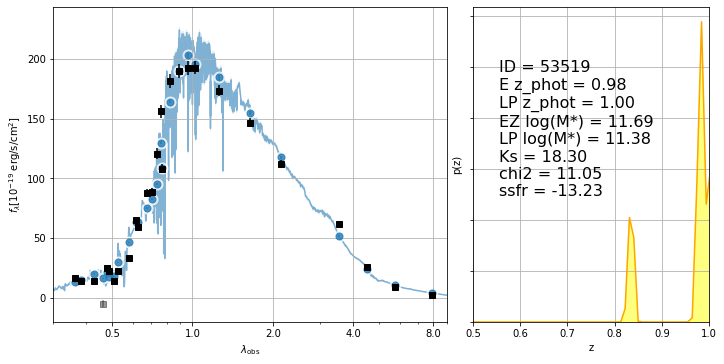

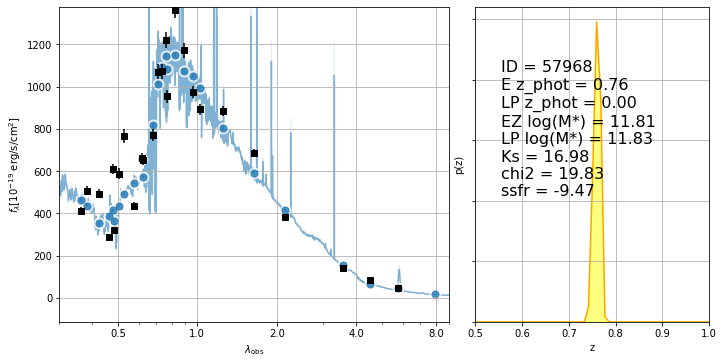

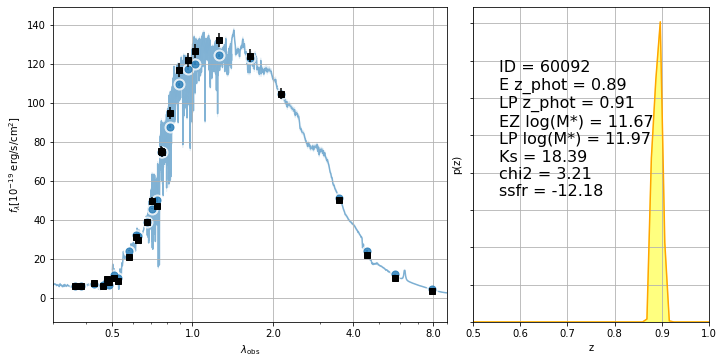

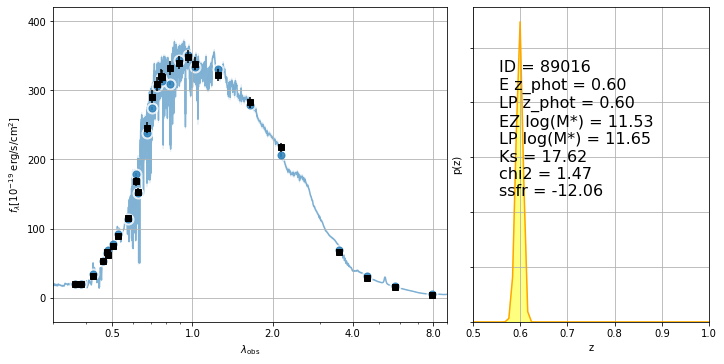

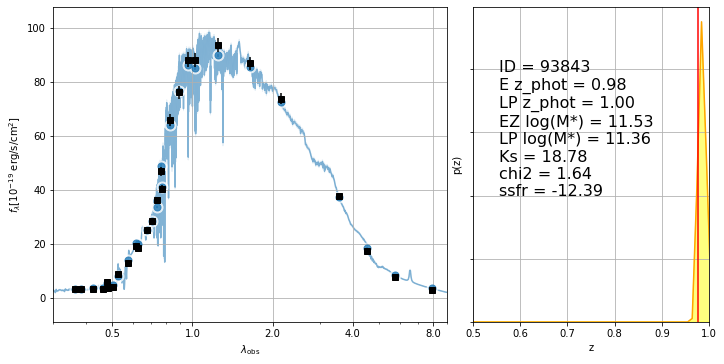

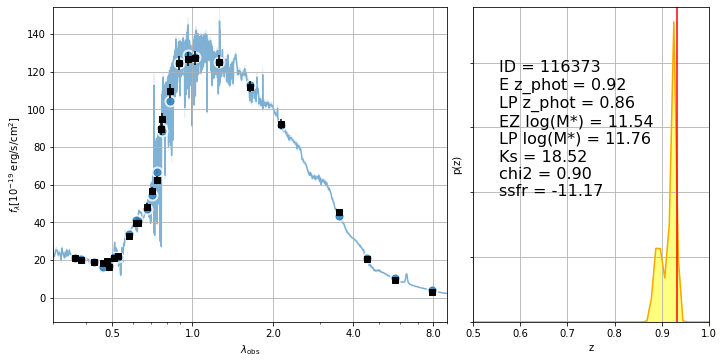

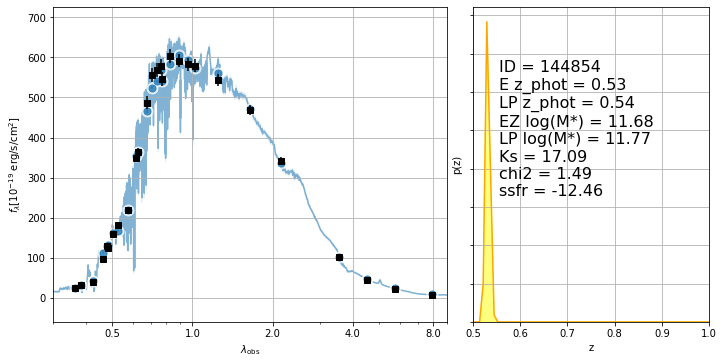

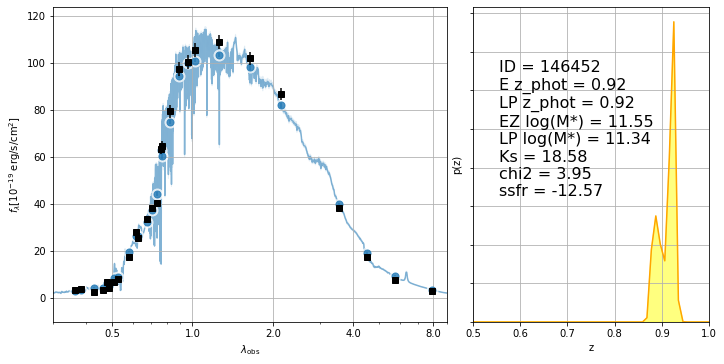

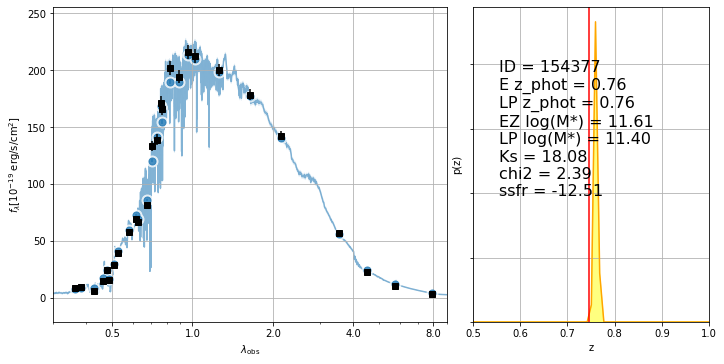

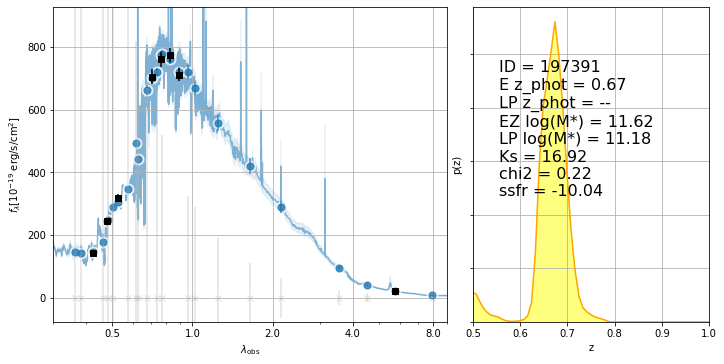

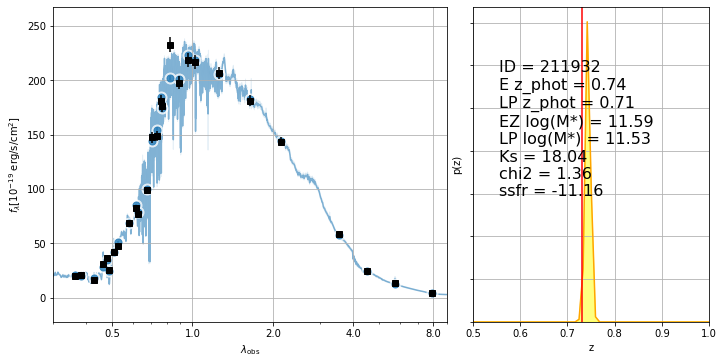

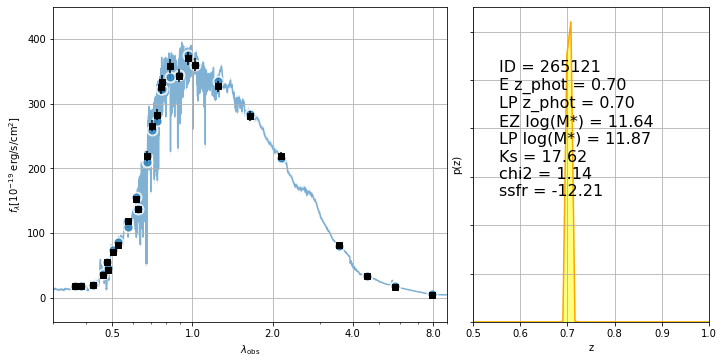

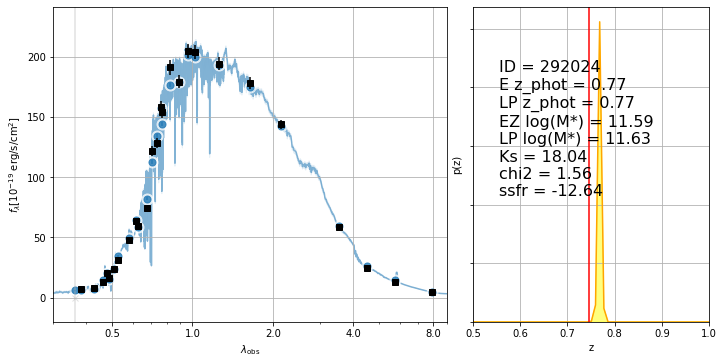

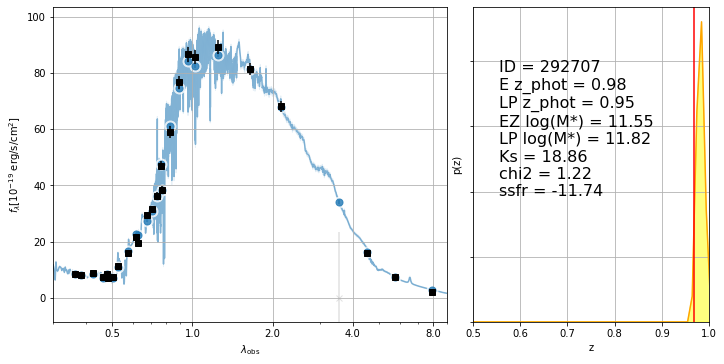

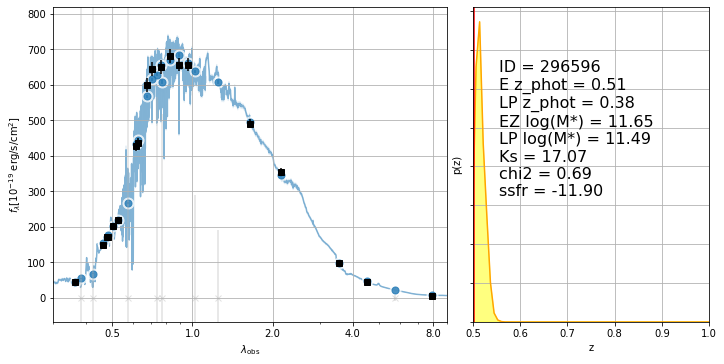

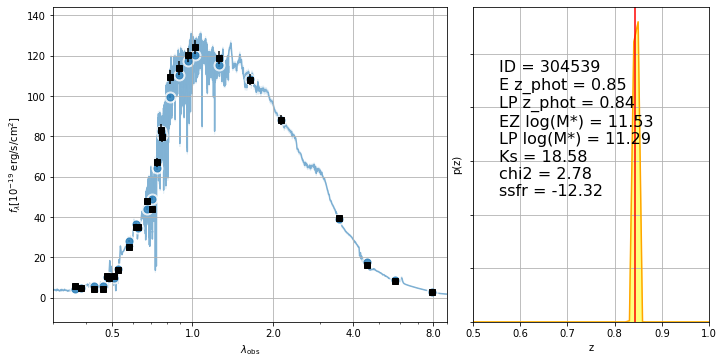

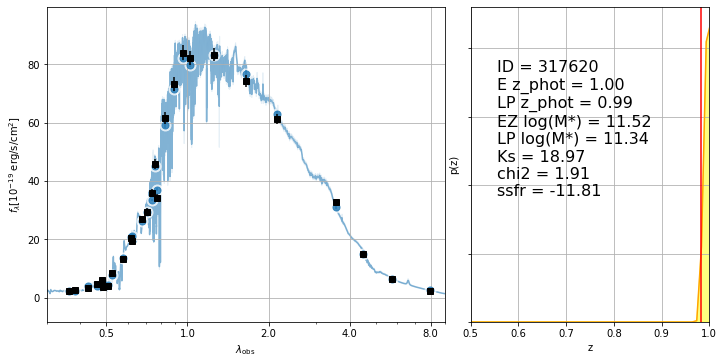

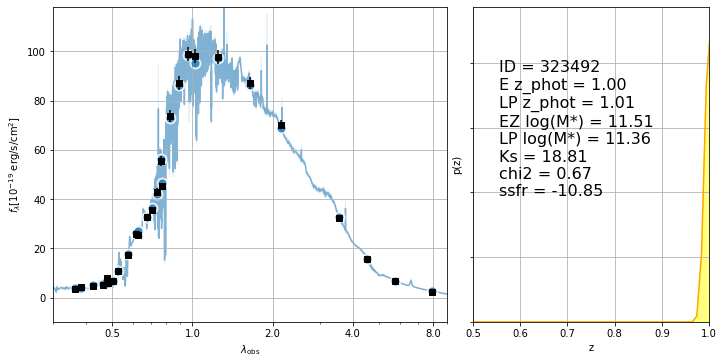

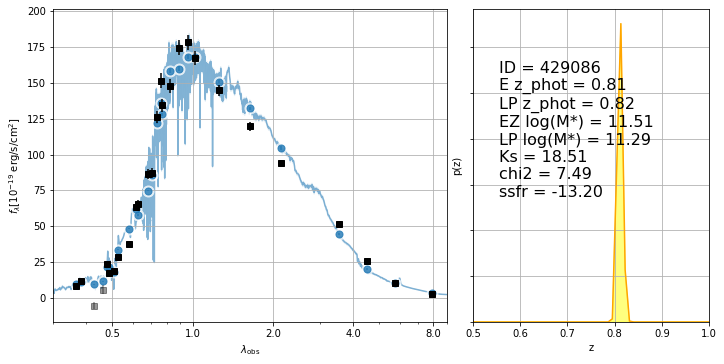

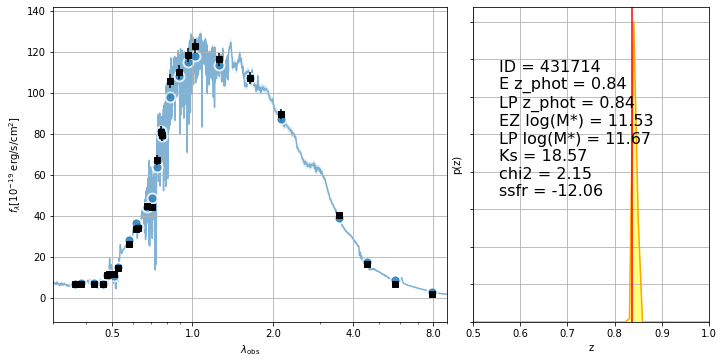

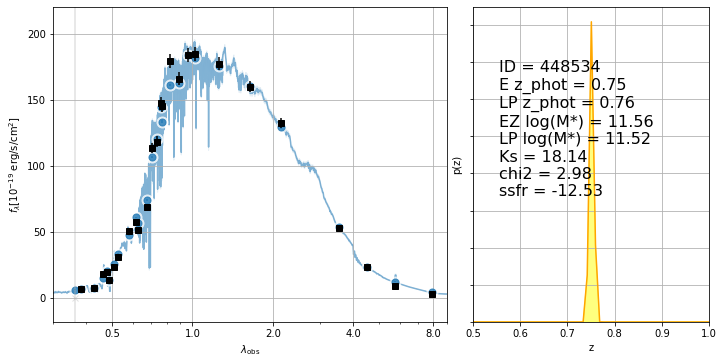

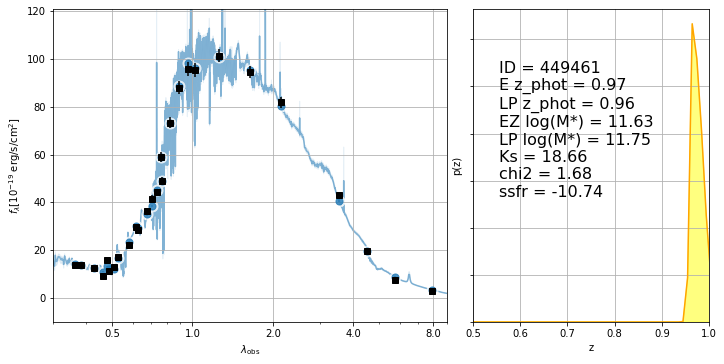

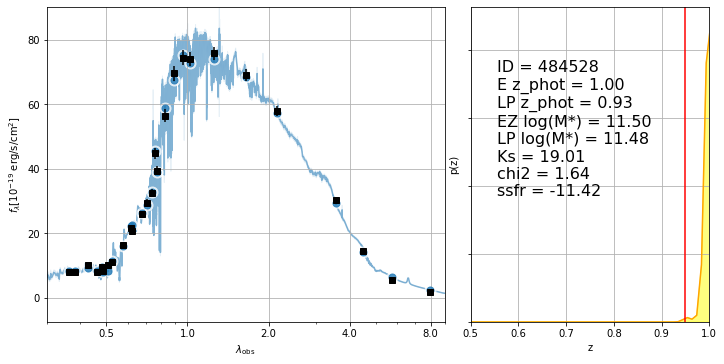

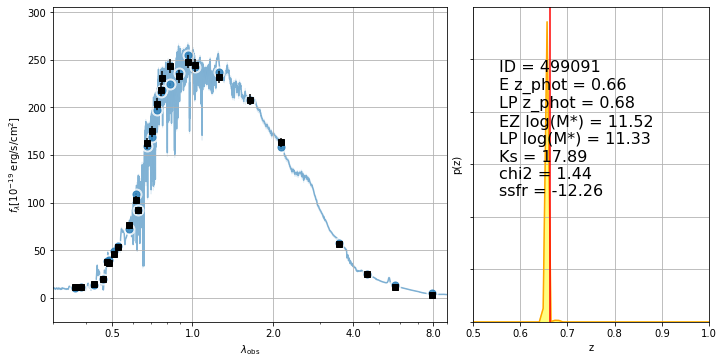

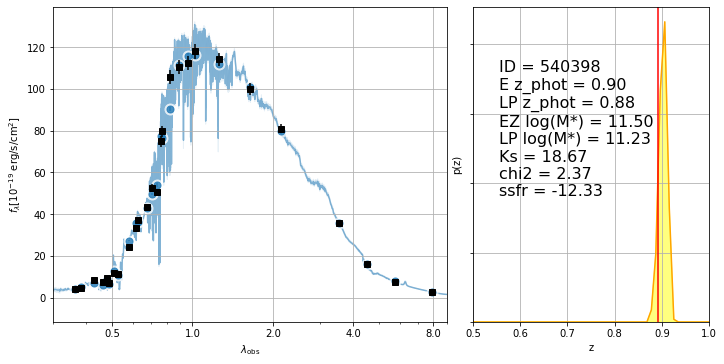

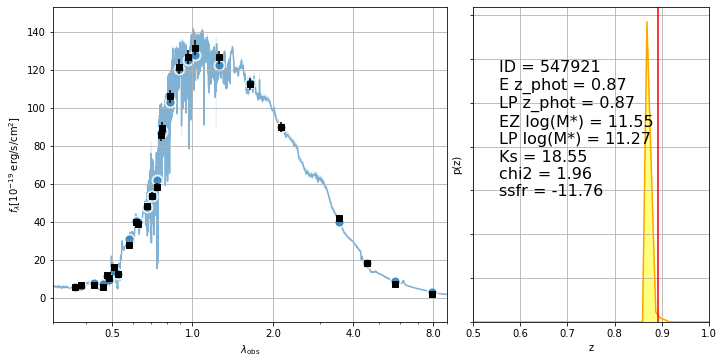

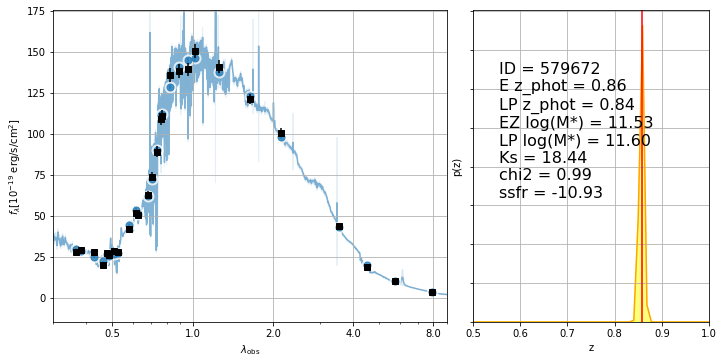

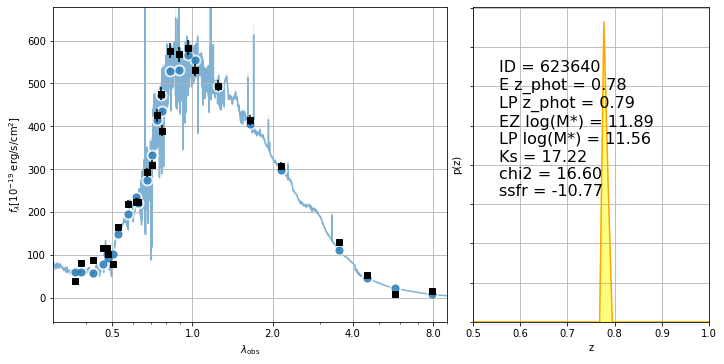

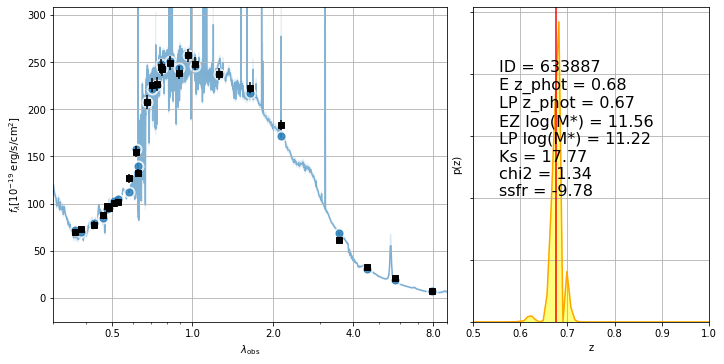

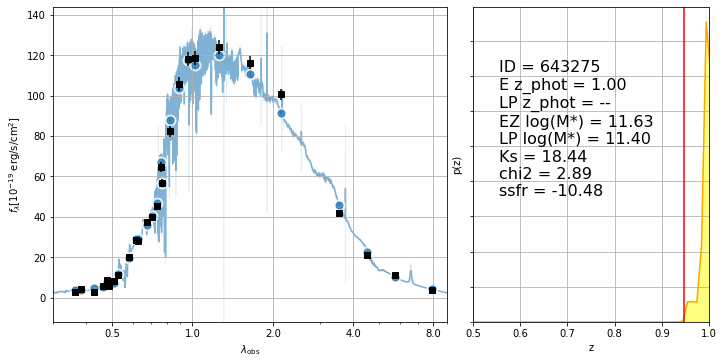

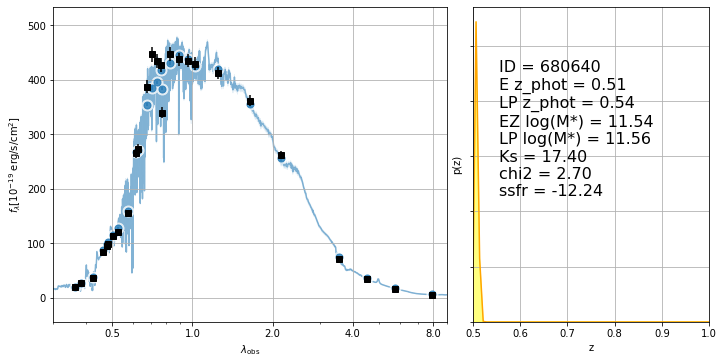

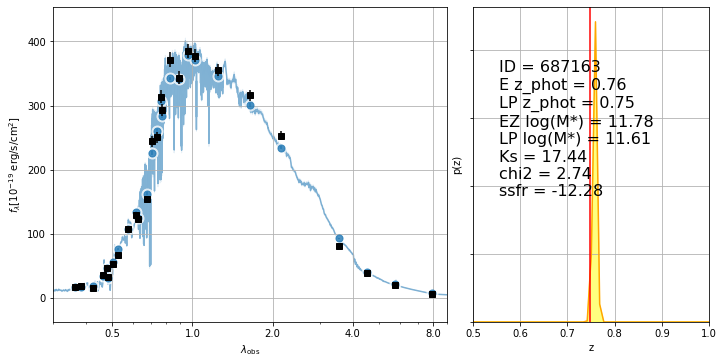

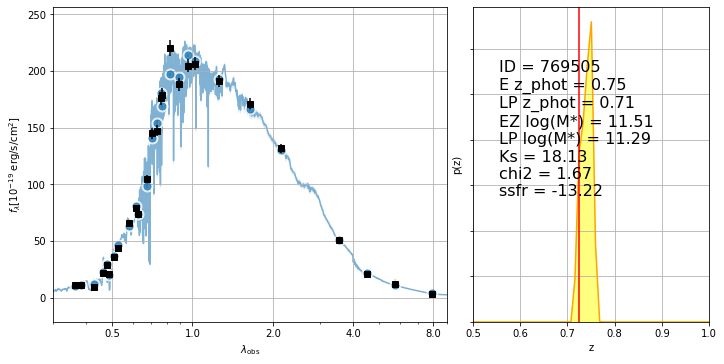

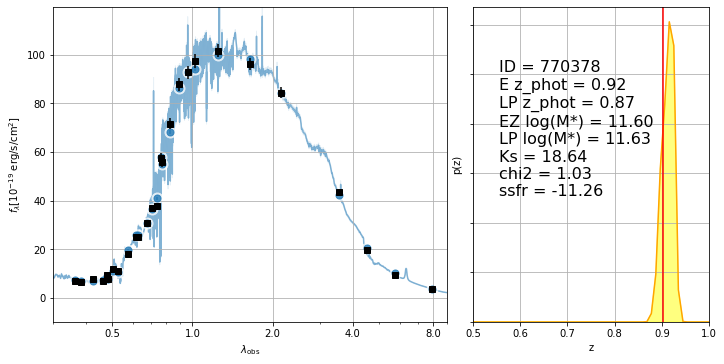

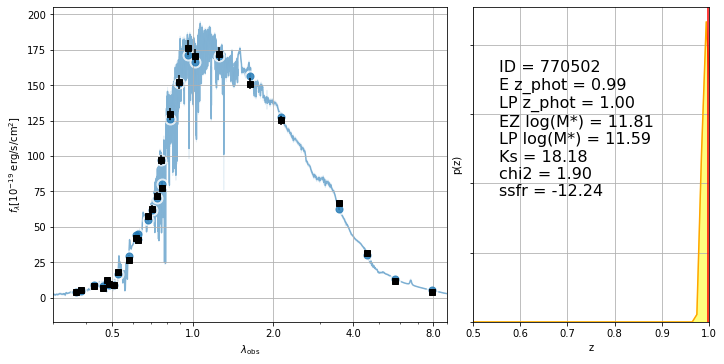

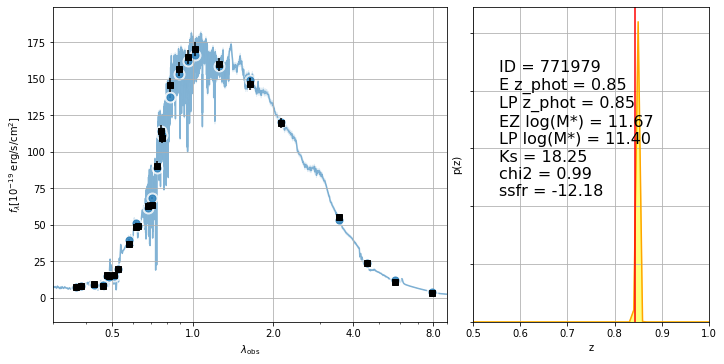

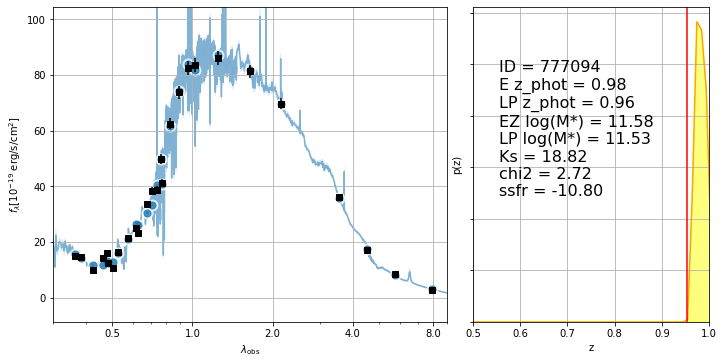

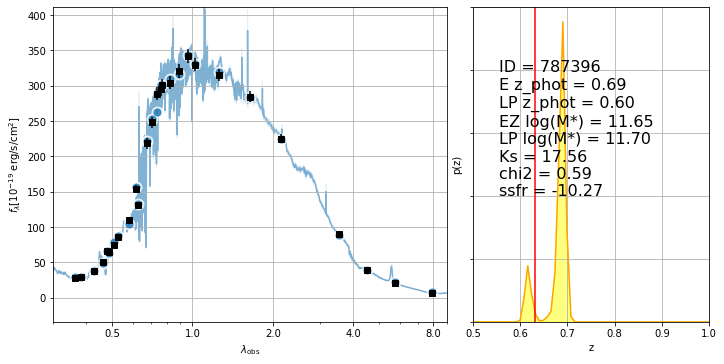

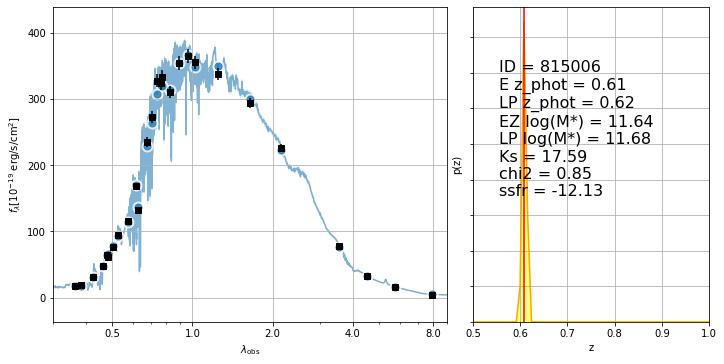

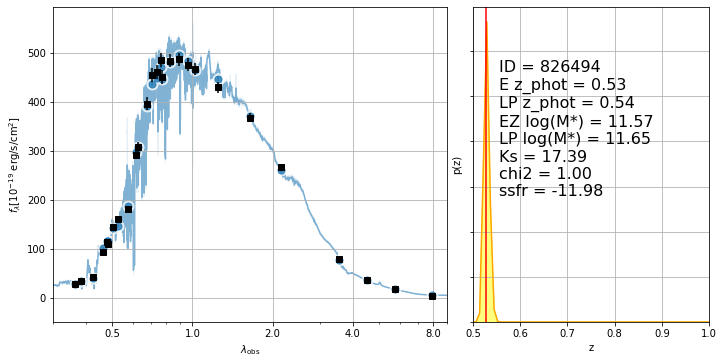

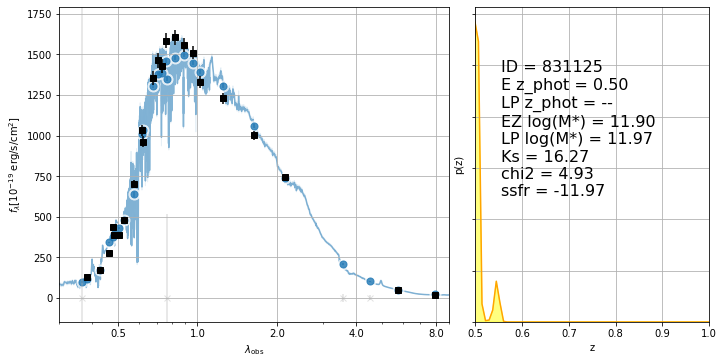

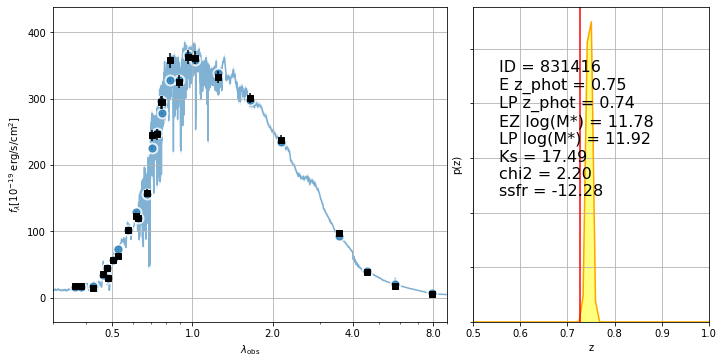

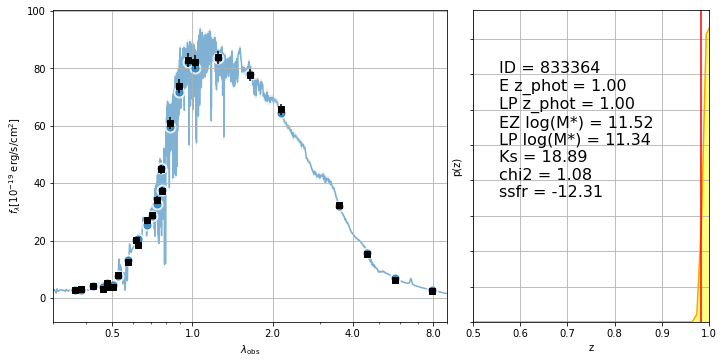

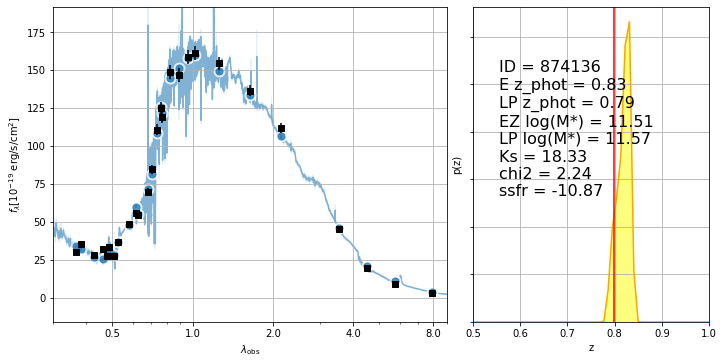

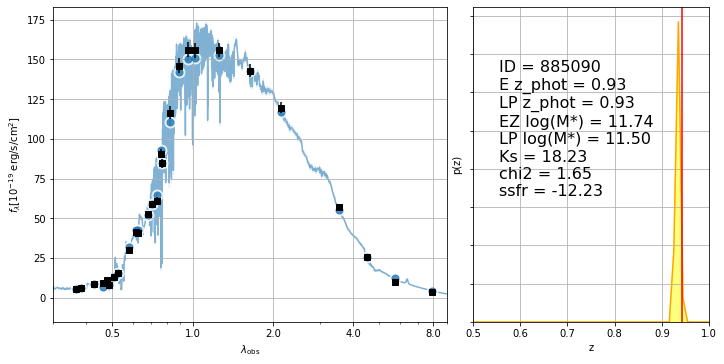

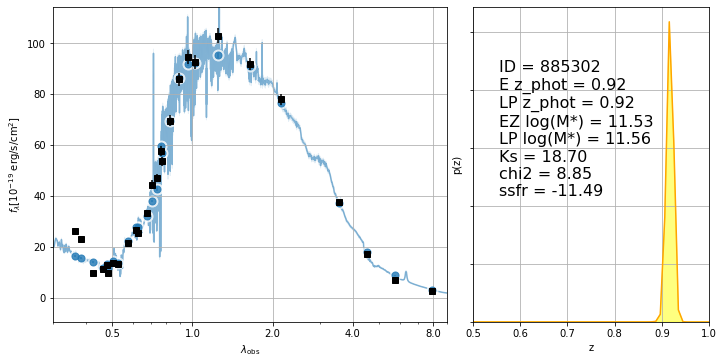

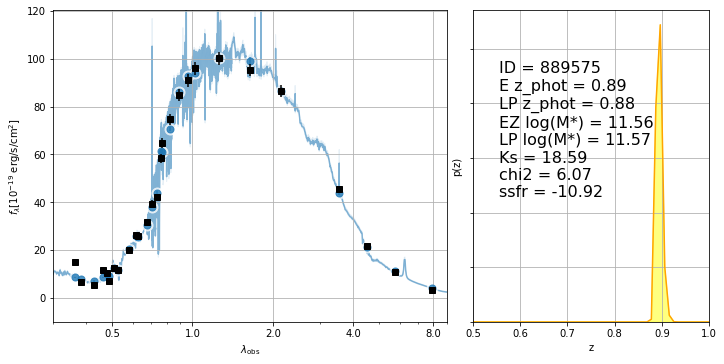

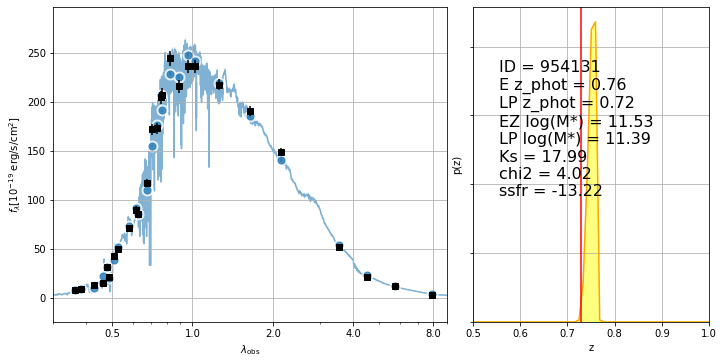

In [13]:
#np.array([711641,]))

ids = cat[qsel]['ID']
kmag = cat[qsel]['UVISTA_Ks_MAG']
zs = cat[qsel]['ez_z_phot']
ezm = cat[qsel]['ez_mass']
lpz = cat[qsel]['lp_zBEST']
lpm = cat[qsel]['lp_mass_best']
chi = cat[qsel]['ez_z_phot_chi2']/cat[qsel]['ez_nusefilt']
ssfr = cat[qsel]['ssfr']

for ii,z,m,z2,m2,k,c,c0 in zip(ids,zs,ezm,lpz,lpm,kmag,chi,ssfr):
    _ = self.show_fit(ii,show_fnu=False,zr=(zlo,zhi),figsize=(10,5),show_components=False,add_label=False)
    fig = plt.gcf()
    ax = fig.axes[1]
    ax2 = fig.axes[0]
    #ax2.set_ylim(0,5)
    
    plt.text(x = 0.11, y = .4, \
           s = f'ID = {ii}'
            '\n'                                                        
            f'E z_phot = {z:.2f}'
            '\n'
            f'LP z_phot = {z2:.2f}'
            '\n'
            f'EZ log(M*) = {m:.2f}'
           '\n'
            f'LP log(M*) = {m2:.2f}'
           '\n'
           f'Ks = {k:.2f}'
            '\n'
           f'chi2 = {c:.2f}'
            '\n'
           f'ssfr = {c0:.2f}',fontsize=16,
           transform=ax.transAxes)

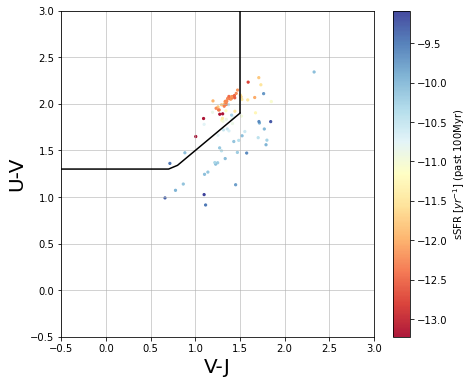

In [14]:
uvj(cat[fsel])

# Starting  here I am adapting the code
## my selection

In [15]:
from astropy.table import Table
from tabulate import tabulate
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9 as cosmo
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM
import numpy as np
from astropy import units as u
cosmo = FlatLambdaCDM(H0=67.8, Om0=0.308)
import math
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.nddata.utils import Cutout2D

def obs_vol(redshift,angulardistance): #assumes square fov in deg
    d_A1 = cosmo.angular_diameter_distance(z=redshift)
    d_A2 = cosmo.luminosity_distance(z=redshift)
    theta = (angulardistance*u.degree).to(u.rad)
    distance_Mpc = (theta * d_A1).to(u.Mpc, u.dimensionless_angles()) # unit is Mpc only now
    volume = distance_Mpc**2*d_A2/3
    return volume

def actual_size(redshift,obs_size):
    d_A1 = cosmo.angular_diameter_distance(z=redshift)
    theta = (obs_size/3600*u.degree).to(u.rad)
    size_kpc = (theta * d_A1).to(u.kpc, u.dimensionless_angles())
    return size_kpc

def uvj_withparentsample(cat,Sample,parentsample,save=False):

    labels = { 'z' :r'$z_{phot}$', 
         'mass' : r'Stellar mass [$M_{\odot}$]',
         'ssfr': r'sSFR [$yr^{-1}$] (past 100Myr)',
          'sfr': r'SFR [$M_{\odot}yr^{-1}$]',
              'age':'Age [Gyr]',
         'fsize': 20}


    plt.figure(figsize=(7,6),dpi=100)
    plt.scatter(cat['vj'][parentsample],cat['uv'][parentsample],\
                    color='lightgrey',\
                s=5, alpha=0.9)
    sc = plt.scatter(cat[Sample]['vj'],cat[Sample]['uv'],\
                    c=cat[Sample]['lp_age']/1e9,cmap='RdYlBu_r',\
                s=5, alpha=0.9)

    cb = plt.colorbar(sc)
    cb.set_label(labels['age'])

    plt.xlabel('V-J',fontsize=labels['fsize'])
    plt.ylabel('U-V',fontsize=labels['fsize'])

    plt.grid(alpha=0.7)

    plt.xlim(-0.5,3)
    plt.ylim(-0.5,3)

    vj = np.arange(-1,1.6,0.1)
    uv = [sep_line(v) for v in vj]
    sep_x = np.arange(-0.5,1.05,0.01)
    sep_y = -1.25*sep_x+2.85
    plt.vlines(x=1.5, ymin=1.9,ymax = 3,color='black')
    plt.plot(sep_x,sep_y,color='black')
    plt.plot(vj,uv,c='black')
    
    if save:
        plt.savefig('uvj-test.pdf')
def lower_mass(Sample):
    mass=12
    while mass>9:
        mass_sample = Sample & (cat["ez_mass"]>mass)
        if (np.sum(mass_sample)/np.sum(Sample))>0.95: 
            break
        else: mass=mass-0.1
    return mass

def log_complete(z,a,b):
    return a+b*np.log10(z)

def weaver_complete(z):
    return -3.79e8*(1+z)+2.98e8*(1+z)**2

def get_stamp(RA,DEC,width):#RA,DEC in deg
    center_degree = SkyCoord(ra=RA,dec=DEC,unit=u.deg)
    center_pixel = w.world_to_pixel(center_degree)
    stamp = Cutout2D(DASH_image,center_pixel,(width,width))
    
    return stamp

## include 3DDASH

In [16]:
dash_morph_file = "/Users/clausen/Documents/jupyter/research/3ddash/hlsp_cosmos-dash_hst_wfc3_cosmos_f160w_v1.3_morph-cat.txt"
RA_dash,DEC_dash,use_flag_dash, mag_galfit_dash,flag_deb = np.loadtxt(dash_morph_file,usecols = (1,2,3,6,23),unpack = True)
dash_re,dash_re_err,dash_axisratio,dash_axisratio_err = np.loadtxt(dash_morph_file,usecols = (7,8,11,12),unpack = True)

dash_image_filename = '/Users/clausen/Documents/jupyter/research/3ddash/hlsp_cosmos-dash_hst_wfc3_cosmos_f160w_v1.2.10_drz-sci.fits'
fn = get_pkg_data_filename(dash_image_filename)
f = fits.open(fn)
w = WCS(f[0].header)
DASH_image = fits.open(fn)[0].data


In [17]:
#crossmatching cosmos with 3ddash
dash_coordinates = SkyCoord(ra=RA_dash*u.degree,dec=DEC_dash*u.degree)
cosmos_coordinates = SkyCoord(ra=cat["ALPHA_J2000"],dec=cat["DELTA_J2000"],unit=u.deg)

dash_id, d2d,d3d = cosmos_coordinates.match_to_catalog_sky(dash_coordinates) #every element in cosmos gets mathed id in dash,2d and 3d seperation


In [18]:
#test crossmatching via matching limits
max_sep_for_match = 4*10**-4*u.degree #use this value since number of dash_mathes approx. number of unique dash_ids
zlow = 0.5
zhigh = 4
mlow = 10.6
mhigh = 12


#add dash keys to cosmos catalog

cat["dash_id"] = dash_id
cat["RA_dash"] = RA_dash[dash_id]
cat["DEC_dash"] = DEC_dash[dash_id]
cat["use_flag_dash"] = use_flag_dash[dash_id]
cat["mag_galfit_dash"] = mag_galfit_dash[dash_id]
cat["flag_deb_dash"] = flag_deb[dash_id]
cat["seperation_cosmos_dash_match"] = d2d
cat["dash_re"]=dash_re[dash_id]
cat["dash_re_err"]=dash_re_err[dash_id]
cat["dash_axisratio"]=dash_axisratio[dash_id]
cat["dash_axisratio_err"]=dash_axisratio_err[dash_id]


In [19]:
dash_matches = (cat["seperation_cosmos_dash_match"]<max_sep_for_match)

sample = (cat['FLAG_COMBINED']==0) & \
        ((cat['ez_z_phot_chi2']/cat['ez_nusefilt'])<20.) & \
        (cat['UVISTA_Ks_MAG']<25.) \
        & (cat['STAR_FLAG']==0) \
        & (cat['ez_z_phot']>zlow)& \
        (cat['ez_z_phot']<zhigh) & \
        dash_matches \
        & (cat["use_flag_dash"]== 1) \
        & (cat["flag_deb_dash"]==0)
    


of the selected 1210 quiescent galaxies 1052 are old and 158 are young


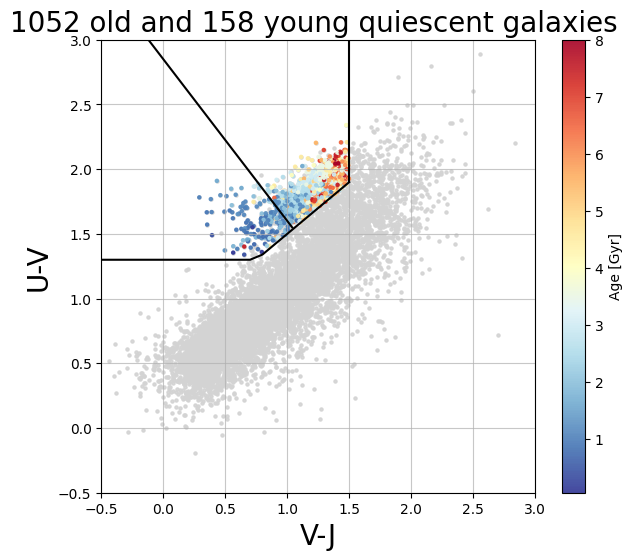

In [20]:
#quiescent selection
       
w_o_masscut_quiescent_sample = sample & sel_uvj(cat)        
quiescent_sample = sample & sel_uvj(cat) & (cat['ez_mass']>10.4)#(log_complete(cat['ez_z_phot'],9.39,1.21)))#mass_fit_a,mass_fit_b)))#& (cat["ez_mass"]> mlow)
old_quiescent_sample = quiescent_sample & (np.invert((cat["uv"]< (-1.25*cat['vj']+2.85))))
young_quiescent_sample = quiescent_sample & (cat["uv"]< (-1.25*cat['vj']+2.85))

                                           #plt.scatter(cat["vj"][sample],cat["uv"][sample],c="grey")
uvj_withparentsample(cat,quiescent_sample,sample)
plt.title(str(np.sum(old_quiescent_sample))+" old and "
      +str(np.sum(young_quiescent_sample))+" young quiescent galaxies ",fontsize=20)
#plt.figure(dpi=300)
plt.savefig('Sample_color_age.png')
starforming_sample = sample & (np.invert(sel_uvj(cat))) 
missing = sample & ( np.invert(sel_uvj(cat))) & (np.invert(np.invert(sel_uvj(cat))))

print("of the selected "+str(np.sum(quiescent_sample))+" quiescent galaxies " \
      + str(np.sum(old_quiescent_sample))+" are old and "
      +str(np.sum(young_quiescent_sample))+" are young")
#print(np.sum(young_quiescent_sample)+np.sum(old_quiescent_sample))
#make old/young ((U −V ) = −1.25×(V −J )+2.85),

## creating the numberdensity plot

In [21]:
count_q_o, z_q_o,bars_qosample = plt.hist(cat["ez_z_phot"][old_quiescent_sample])
count_q_y, z_q_y, bars_qysample = plt.hist(cat["ez_z_phot"][young_quiescent_sample])
plt.close()
z_o_q = z_q_o[1:]-(z_q_o[1:]-z_q_o[:-1])/2
Volume_o_q = obs_vol(z_q_o[1:],0.66)-obs_vol(z_q_o[:-1],0.66)#in Mpc^3
number_density_per_volume_o_q = count_q_o/Volume_o_q

z_y_q = z_q_y[1:]-(z_q_y[1:]-z_q_y[:-1])/2
Volume_y_q = obs_vol(z_q_y[1:],0.66)-obs_vol(z_q_y[:-1],0.66)#in Mpc^3
number_density_per_volume_y_q = count_q_y/Volume_y_q

z_o_q_err = (z_q_o[1:]-z_q_o[:-1])/2
z_y_q_err = (z_q_y[1:]-z_q_y[:-1])/2

In [22]:
from astropy.cosmology import z_at_value
def get_z(lookbacktime):
    return z_at_value(cosmo.lookback_time,lookbacktime*u.Gyr).value
def get_lookback(z):
    return cosmo.lookback_time(z).value
get_z(2)


0.1546788147238684

/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_803/1786142958.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(time_o_q,number_density_per_volume_o_q,yerr=n_q_o_err,xerr= time_o_q_err,\
/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_803/1786142958.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(time_y_q,number_density_per_volume_y_q,yerr=n_q_y_err,xerr= time_y_q_err,\


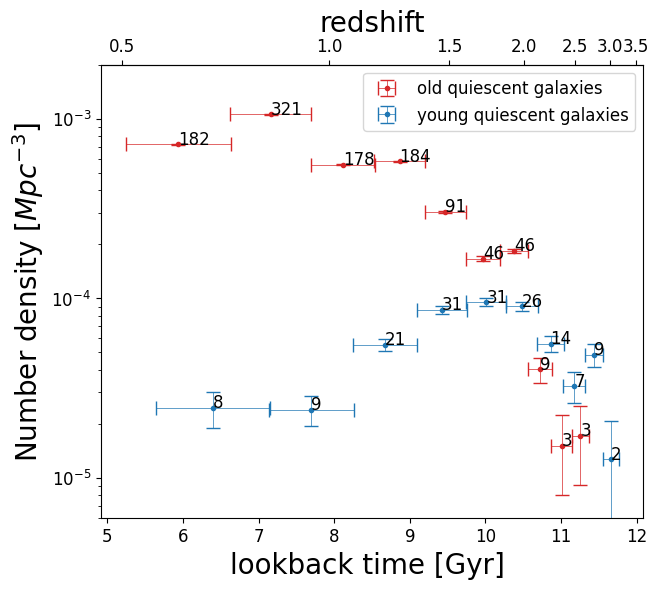

In [37]:
n_q_o_err = (np.sqrt(((count_q_o)/count_q_o)**2+((count_q_o-count_q_o**2)/count_q_o**2-1/count_q_o)**2))/Volume_o_q#poissonfehler und cosmische Variance
n_q_y_err = (np.sqrt(((count_q_y)/count_q_y)**2+((count_q_y-count_q_y**2)/count_q_y**2-1/count_q_y)**2))/Volume_o_q#poissonfehler und cosmische Variance

figure,ax1=plt.subplots(figsize=(7,6),dpi=100) 
plt.rcParams.update({'font.size': 12})

time_q_o = cosmo.lookback_time(z_q_o).value#binabschnitte
time_o_q = cosmo.lookback_time(z_o_q).value#bin mittelwerte
time_o_q_err = (time_q_o[1:]-time_q_o[:-1])/2

ax1.errorbar(time_o_q,number_density_per_volume_o_q,yerr=n_q_o_err,xerr= time_o_q_err,\
             color="tab:red",fmt='.k',label="old quiescent galaxies",capsize=5,elinewidth=0.5)#
for i, txt in enumerate(count_q_o): ax1.annotate(int(txt), (time_o_q[i], number_density_per_volume_o_q[i].value))

time_q_y = cosmo.lookback_time(z_q_y).value#binabschnitte
time_y_q = cosmo.lookback_time(z_y_q).value#bin mittelwerte
time_y_q_err = (time_q_y[1:]-time_q_y[:-1])/2
ax2 = ax1.secondary_xaxis('top', functions=(get_z,get_lookback))
ax2.set_xlabel('redshift',fontsize=20)

ax1.errorbar(time_y_q,number_density_per_volume_y_q,yerr=n_q_y_err,xerr= time_y_q_err,\
             color="tab:blue",fmt='.k',label="young quiescent galaxies",capsize=5,elinewidth=0.5)
for i, txt in enumerate(count_q_y): ax1.annotate(int(txt), (time_y_q[i], number_density_per_volume_y_q[i].value))


plt.yscale('log')
plt.ylim(6e-6,2e-3)
ax1.set_xlabel("lookback time [Gyr] ",fontsize=20)

plt.ylabel(r"Number density [$Mpc^{-3}$]",fontsize=20)
plt.legend()
figure.savefig('Numberdensity_dash_mass10_4.png')


## creating same plot but with only Cosmos2020

of the selected 9606 quiescent galaxies 7081 are old and 2525 are young


/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_803/250082459.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax4.errorbar(time_o_q_c,number_density_per_volume_o_q_c,yerr=n_q_o_c_err,xerr= time_o_q_c_err,\
/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_803/250082459.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax4.errorbar(time_y_q_c,number_density_per_volume_y_q_c,yerr=n_q_y_c_err,xerr= time_y_q_c_err,\


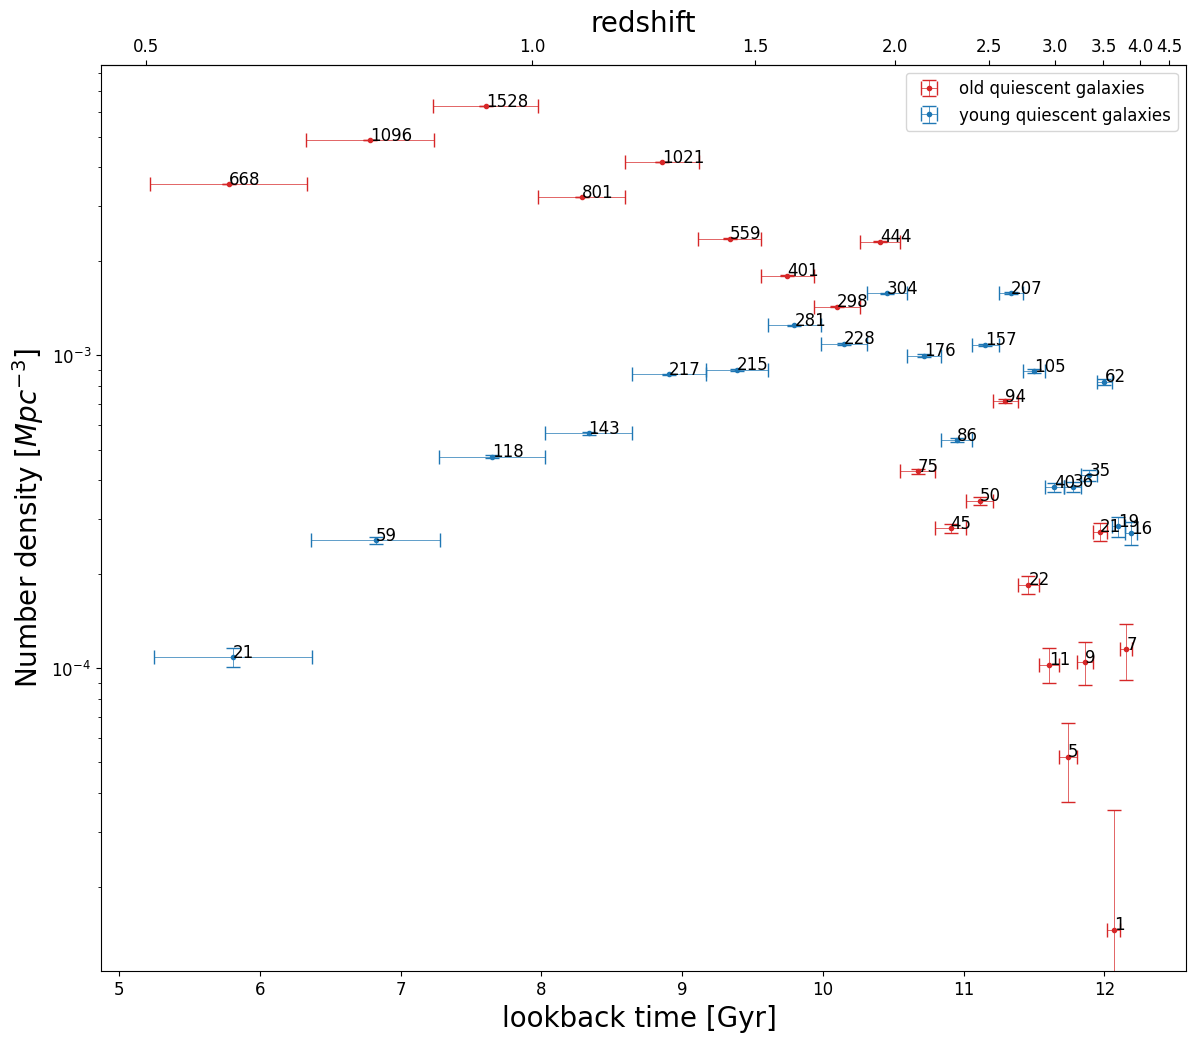

In [47]:
#remake numberdensity plot with only cosmos
zlow_c = 0.5
zhigh_c = 4
mlow = 10.4
sample_c = (cat['FLAG_COMBINED']==0) & \
        ((cat['ez_z_phot_chi2']/cat['ez_nusefilt'])<20.) & \
        (cat['UVISTA_Ks_MAG']<25.) \
        & (cat['STAR_FLAG']==0) \
        & (cat['ez_z_phot']>zlow_c)& \
        (cat['ez_z_phot']<zhigh_c) 

quiescent_sample_c = sample_c & sel_uvj(cat) & (cat["ez_mass"]> mlow)
old_quiescent_sample_c = quiescent_sample_c & (np.invert((cat["uv"]< (-1.25*cat['vj']+3))))
young_quiescent_sample_c = quiescent_sample_c & (cat["uv"]< (-1.25*cat['vj']+3))

#uvj_withparentsample(cat,quiescent_sample_c,sample_c)


print("of the selected "+str(np.sum(quiescent_sample_c))+" quiescent galaxies " \
      + str(np.sum(old_quiescent_sample_c))+" are old and "
      +str(np.sum(young_quiescent_sample_c))+" are young")

count_q_o_c, z_q_o_c,bars_qosample_c = plt.hist(cat["ez_z_phot"][old_quiescent_sample_c],bins=20)
count_q_y_c, z_q_y_c, bars_qysample_c = plt.hist(cat["ez_z_phot"][young_quiescent_sample_c],bins=20)
plt.close()
z_o_q_c = z_q_o_c[1:]-(z_q_o_c[1:]-z_q_o_c[:-1])/2
Volume_o_q_c = obs_vol(z_q_o_c[1:],0.66)-obs_vol(z_q_o_c[:-1],0.66)#in Mpc^3
number_density_per_volume_o_q_c = count_q_o_c/Volume_o_q_c

z_y_q_c = z_q_y_c[1:]-(z_q_y_c[1:]-z_q_y_c[:-1])/2
Volume_y_q_c = obs_vol(z_q_y_c[1:],0.66)-obs_vol(z_q_y_c[:-1],0.66)#in Mpc^3
number_density_per_volume_y_q_c = count_q_y_c/Volume_y_q_c

z_o_q_c_err = (z_q_o_c[1:]-z_q_o_c[:-1])/2
z_y_q_c_err = (z_q_y_c[1:]-z_q_y_c[:-1])/2

time_q_o_c = cosmo.lookback_time(z_q_o_c).value#binabschnitte
time_o_q_c = cosmo.lookback_time(z_o_q_c).value#bin mittelwerte
time_o_q_c_err = (time_q_o_c[1:]-time_q_o_c[:-1])/2

time_q_y_c = cosmo.lookback_time(z_q_y_c).value#binabschnitte
time_y_q_c = cosmo.lookback_time(z_y_q_c).value#bin mittelwerte
time_y_q_c_err = (time_q_y_c[1:]-time_q_y_c[:-1])/2

n_q_o_c_err = (np.sqrt(((count_q_o_c)/count_q_o_c)**2+((count_q_o_c-count_q_o_c**2)/count_q_o_c**2-1/count_q_o_c)**2))/Volume_o_q_c#poissonfehler und cosmische Variance
n_q_y_c_err = (np.sqrt(((count_q_y_c)/count_q_y_c)**2+((count_q_y_c-count_q_y_c**2)/count_q_y_c**2-1/count_q_y_c)**2))/Volume_o_q_c#poissonfehler und cosmische Variance

figure,ax4=plt.subplots(figsize=(14,12),dpi=100) 
plt.rcParams.update({'font.size': 12})



ax4.errorbar(time_o_q_c,number_density_per_volume_o_q_c,yerr=n_q_o_c_err,xerr= time_o_q_c_err,\
             color="tab:red",fmt='.k',label="old quiescent galaxies",capsize=5,elinewidth=0.5)#
for i, txt in enumerate(count_q_o_c): ax4.annotate(int(txt), (time_o_q_c[i], number_density_per_volume_o_q_c[i].value))


ax5 = ax4.secondary_xaxis('top', functions=(get_z,get_lookback))
ax5.set_xlabel('redshift',fontsize=20)

ax4.errorbar(time_y_q_c,number_density_per_volume_y_q_c,yerr=n_q_y_c_err,xerr= time_y_q_c_err,\
             color="tab:blue",fmt='.k',label="young quiescent galaxies",capsize=5,elinewidth=0.5)
for i, txt in enumerate(count_q_y_c): ax4.annotate(int(txt), (time_y_q_c[i], number_density_per_volume_y_q_c[i].value))


plt.yscale('log')
#plt.ylim(6e-6,2e-3)
ax4.set_xlabel("lookback time [Gyr] ",fontsize=20)

plt.ylabel(r"Number density [$Mpc^{-3}$]",fontsize=20)
plt.legend()
#figure.savefig('Numberdensity_dash_mlow10_4.png')


## Size evolution plot

In [25]:
#calculate size

size_o_q = actual_size(cat['ez_z_phot'][old_quiescent_sample],cat['dash_re'][old_quiescent_sample]).value
size_y_q = actual_size(cat['ez_z_phot'][young_quiescent_sample],cat['dash_re'][young_quiescent_sample]).value

#bin sizes and calculate average
size_bin_o_q = np.array([])
size_bin_y_q = np.array([])
size_bin_o_q_err = np.array([])
size_bin_y_q_err = np.array([])
axratio_bin_o_q = np.array([])
axratio_bin_y_q = np.array([])
axratio_bin_o_q_err = np.array([])
axratio_bin_y_q_err = np.array([])

for i in range(0,len(z_y_q)):
    sizes_y = young_quiescent_sample & (cat['ez_z_phot']>(z_y_q[i]-z_y_q_err[i]))&(cat['ez_z_phot']<(z_y_q[i]+z_y_q_err[i]))    
    size_bin_y_q = np.append(size_bin_y_q,np.average(actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value))
    size_bin_y_q_err = np.append(size_bin_y_q_err,np.std(actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value)/(np.sqrt(np.sum(sizes_y))))
    axratio_bin_y_q = np.append(axratio_bin_y_q,np.average(cat['dash_axisratio'][sizes_y]))
    axratio_bin_y_q_err = np.append(axratio_bin_y_q_err,np.std(cat['dash_axisratio'][sizes_y])/(np.sqrt(np.sum(sizes_y))))
    
    sizes_o = old_quiescent_sample & (cat['ez_z_phot']>(z_y_q[i]-z_y_q_err[i]))&(cat['ez_z_phot']<(z_y_q[i]+z_y_q_err[i]))
    size_bin_o_q = np.append(size_bin_o_q,np.average(actual_size(cat['ez_z_phot'][sizes_o],cat['dash_re'][sizes_o]).value))
    size_bin_o_q_err = np.append(size_bin_o_q_err,np.std(actual_size(cat['ez_z_phot'][sizes_o],cat['dash_re'][sizes_o]).value)/(np.sqrt(np.sum(sizes_o))))
    axratio_bin_o_q = np.append(axratio_bin_o_q,np.average(cat['dash_axisratio'][sizes_o]))
    axratio_bin_o_q_err = np.append(axratio_bin_o_q_err,np.std(cat['dash_axisratio'][sizes_o])/(np.sqrt(np.sum(sizes_o))))
   
    
#test for loop
print(max(axratio_bin_y_q))

0.6712857142857143


/opt/miniconda3/envs/grizli/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/miniconda3/envs/grizli/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_803/1617181290.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax6[0].errorbar(time_y_q,size_bin_y_q,yerr=size_bin_y_q_err,xerr=time_y_q_err,\
/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_803/1617181290.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax6[0].errorbar(time_y_q,size_bin_o_q,yerr=size_bin_o_q_err,xerr=time_y_q_err,\
/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_803/1617181290.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax6[1].errorbar(time_y_q,axratio_bin_y_q,yerr=axratio_bin_y_q_err,xerr=time_y_q_err,\
/var/folders/_r/sm3l_kwx78bflls9fqv

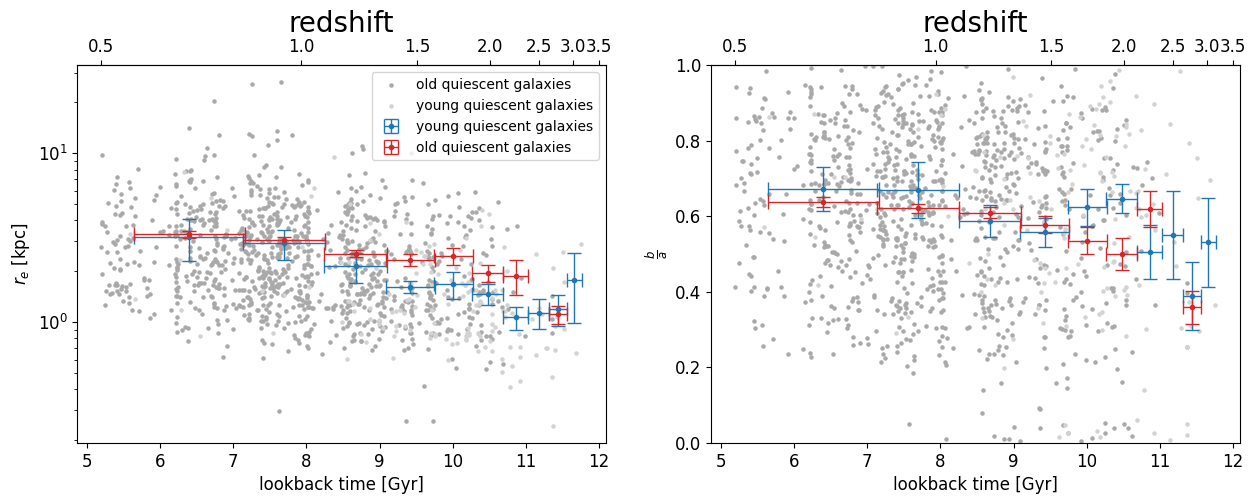

<Figure size 2400x2800 with 0 Axes>

In [26]:
fig,ax6 = plt.subplots(1,2,figsize=(15,5),dpi=100)
plt.figure(figsize=(12,14),dpi=200) 
plt.rcParams.update({'font.size': 12})

ax6[0].scatter(cosmo.lookback_time(cat['ez_z_phot'][old_quiescent_sample]).value,size_o_q,\
               color="darkgrey",label="old quiescent galaxies",s=5)
ax6[0].scatter(cosmo.lookback_time(cat['ez_z_phot'][young_quiescent_sample]).value,size_y_q,\
               color="lightgrey",label="young quiescent galaxies",s=5)
ax6[0].errorbar(time_y_q,size_bin_y_q,yerr=size_bin_y_q_err,xerr=time_y_q_err,\
               color="tab:blue",fmt='.k',label="young quiescent galaxies",capsize=5,elinewidth=1)
ax6[0].errorbar(time_y_q,size_bin_o_q,yerr=size_bin_o_q_err,xerr=time_y_q_err,\
               color="tab:red",fmt='.k',label="old quiescent galaxies",capsize=5,elinewidth=1)

ax7 = ax6[0].secondary_xaxis('top', functions=(get_z,get_lookback))
ax7.set_xlabel('redshift',fontsize=20)

ax6[0].set_yscale('log')
ax6[0].set_xlabel('lookback time [Gyr]')
ax6[0].set_ylabel(r'$r_e$ [kpc]')
ax6[0].legend(fontsize=10)

ax6[1].scatter(cosmo.lookback_time(cat['ez_z_phot'][old_quiescent_sample]).value,cat['dash_axisratio'][old_quiescent_sample],\
               color="darkgrey",label="old quiescent galaxies",s=5)
ax6[1].scatter(cosmo.lookback_time(cat['ez_z_phot'][young_quiescent_sample]).value,cat['dash_axisratio'][young_quiescent_sample],\
               color="lightgrey",label="young quiescent galaxies",s=5)
ax6[1].errorbar(time_y_q,axratio_bin_y_q,yerr=axratio_bin_y_q_err,xerr=time_y_q_err,\
               color="tab:blue",fmt='.k',label="young quiescent galaxies",capsize=5,elinewidth=1)
ax6[1].errorbar(time_y_q,axratio_bin_o_q,yerr=axratio_bin_o_q_err,xerr=time_y_q_err,\
               color="tab:red",fmt='.k',label="old quiescent galaxies",capsize=5,elinewidth=1)
ax8 = ax6[1].secondary_xaxis('top', functions=(get_z,get_lookback))
ax8.set_xlabel('redshift',fontsize=20)

ax6[1].set_ylim(0,1)
ax6[1].set_xlabel('lookback time [Gyr]')
ax6[1].set_ylabel(r'$\frac{b}{a}$')
#ax2[1].legend(fontsize=10)
fig.savefig('sizeevolution.png')

## Postage stemps

Text(0.5, 1.0, 'z=1.182, stellar age=1.8Gyr')

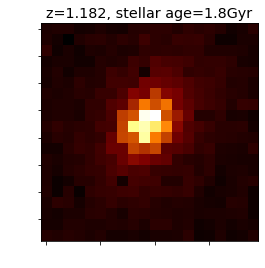

In [27]:
center_x = cat['RA_dash'][young_quiescent_sample][0]
center_y = cat['DEC_dash'][young_quiescent_sample][0]
stamp_try = get_stamp(center_x,center_y,20)
plt.imshow(stamp_try.data,cmap='afmhot')
plt.xticks(color='None')
plt.yticks(color='None')
plt.title('z='+str(np.round(cat['ez_z_phot'][young_quiescent_sample][0],3))+', stellar age='+str(cat['lp_age'][young_quiescent_sample][0]/1e9)+'Gyr')

In [28]:
q_sample_2z3 = quiescent_sample & (cat['ez_z_phot']>2) &(cat['ez_z_phot']<3)
print('between 2<z<3 are '+str(np.sum(q_sample_2z3))+' quiescent galaxies')

between 2<z<3 are 63 quiescent galaxies


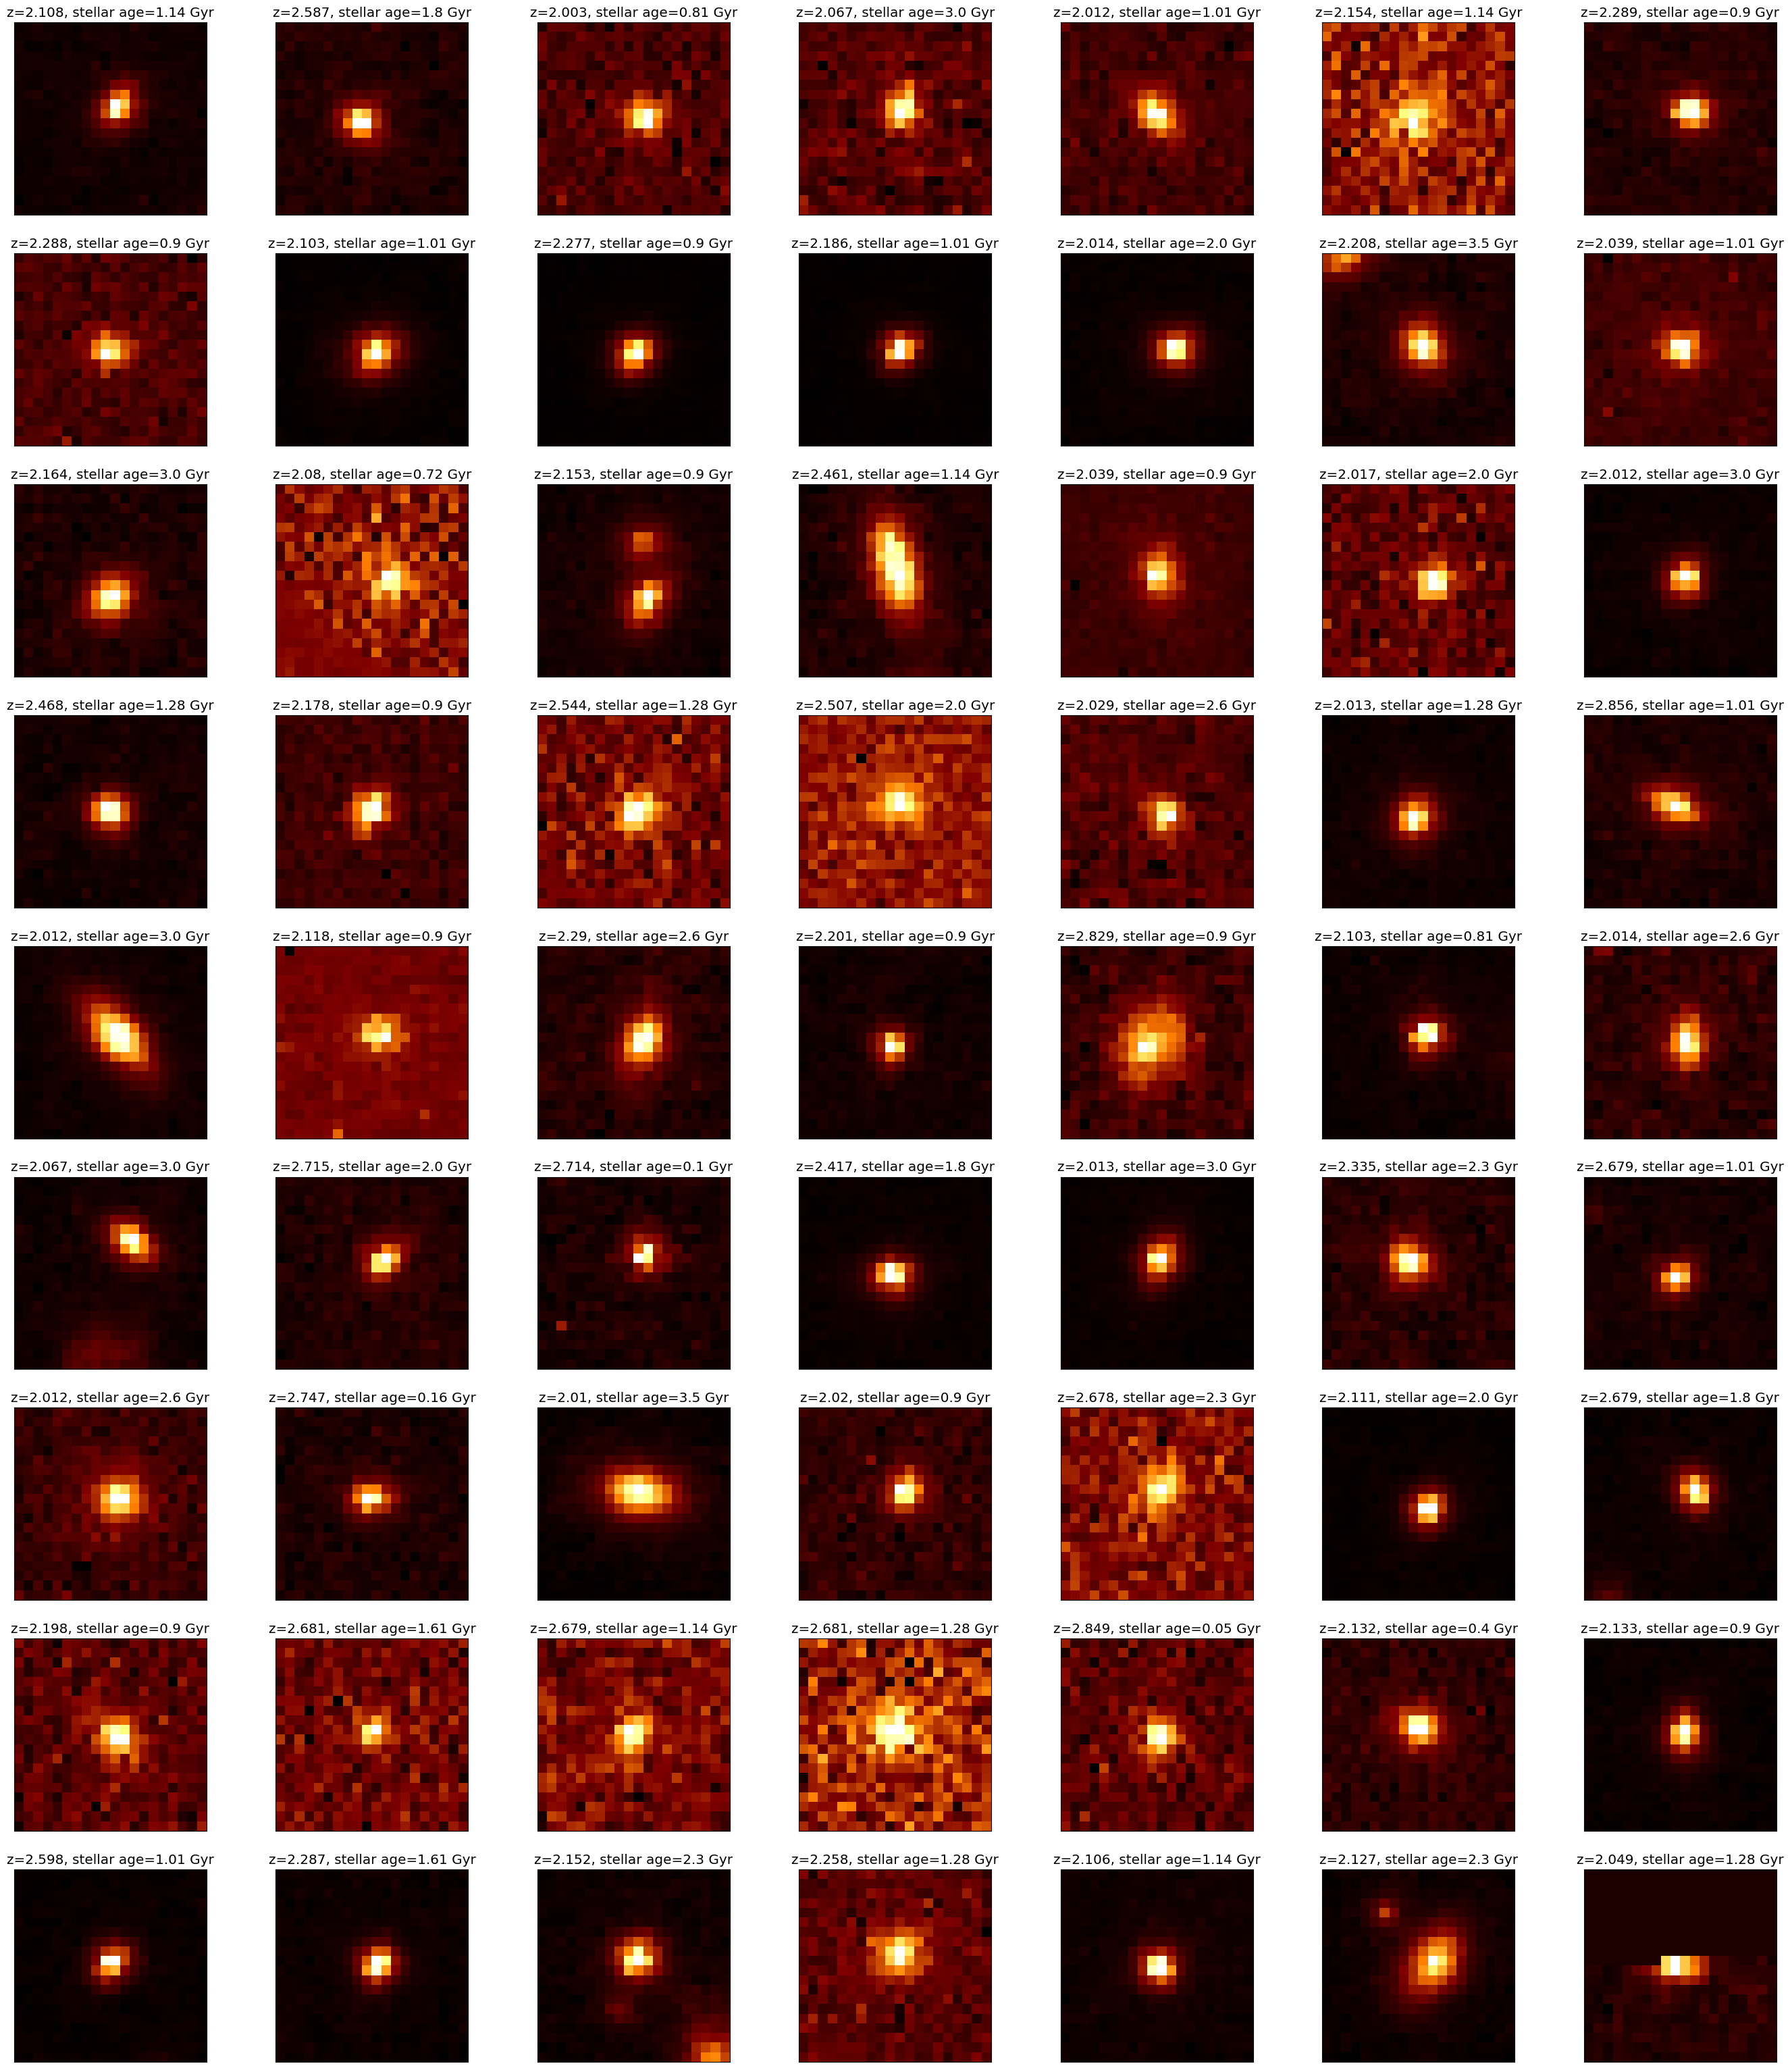

<Figure size 2400x1600 with 0 Axes>

In [29]:
x=0
y=0
fig3, ax3 = plt.subplots(9,7,dpi=100,figsize=(35,40))

for Object in range(0,np.sum(q_sample_2z3)):
    if int(Object/7)==Object/7 and Object>0 and Object<63: 
        x = x+1
        y=0

    center_x = cat['RA_dash'][q_sample_2z3][Object]
    center_y = cat['DEC_dash'][q_sample_2z3][Object]
    stamp = get_stamp(center_x,center_y,20)
    ax3[x][y].imshow(stamp.data,cmap='afmhot')
    ax3[x][y].set_xticks([])
    ax3[x][y].set_yticks([])
    ax3[x][y].set_title('z='+str(np.round(cat['ez_z_phot'][q_sample_2z3][Object],3))+', stellar age='+str(np.round(cat['lp_age'][q_sample_2z3][Object]/1e9,2))+' Gyr')
    y=y+1
# set the spacing between subplots
#plt.subplots_adjust(left=0.1,
#                    bottom=0.1, 
#                    right=0.2, 
#                    top=0.9, 
#                    wspace=0.001, 
#                    hspace=0.05)
#plt.tight_layout(pad=0.1,h_pad=0.01,w_pad=1e-3)
plt.subplots_adjust(wspace=0, hspace=0.2)
plt.figure(dpi=400)
fig3.savefig('stamps_2z3_quiescent.png')

## Mass-vs-redshift plot

In [30]:
#create hist of mass in redshift bins
w_o_masscut_n_mass_redshift_q,w_o_masscut_z_mass_redshift_q, stuff = plt.hist(cat["ez_z_phot"][w_o_masscut_quiescent_sample],bins=20)
plt.close()

#calculate erspective mass limit for redshift bins
w_o_masscut_mass_limit = np.array([])

for x in range(0,len(w_o_masscut_z_mass_redshift_q)-1):
    #print(x,w_o_massscut_z_mass_redshift_q[x])
    w_o_masscut_bin_sample = w_o_masscut_quiescent_sample &(cat["ez_z_phot"]<w_o_masscut_z_mass_redshift_q[x+1]) \
    & (cat["ez_z_phot"]>w_o_masscut_z_mass_redshift_q[x])
    w_o_masscut_mass_limit=np.append(w_o_masscut_mass_limit,lower_mass(w_o_masscut_bin_sample))


20 21 20
a=9.939483354151072, b= 1.214294795692936


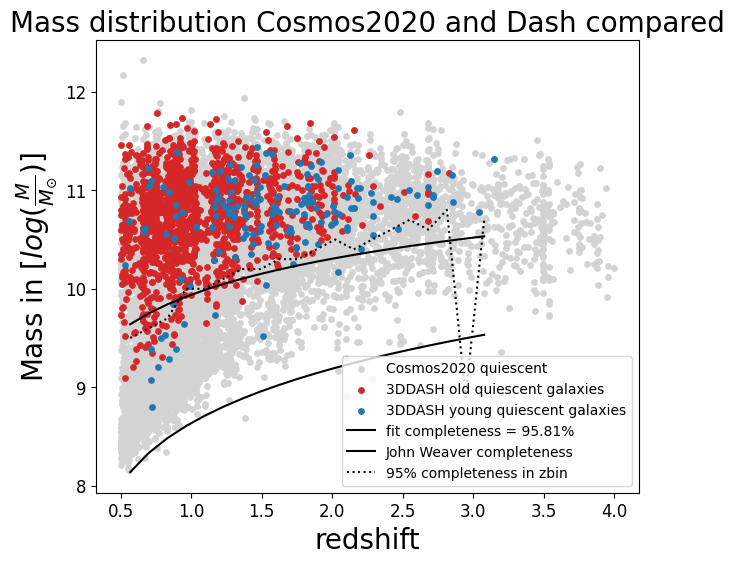

In [31]:
# w_o_massscut_quiescent_sample = sample & sel_uvj(cat) #& (cat['ez_mass']>(log_complete(cat['ez_z_phot'],mass_fit_a,mass_fit_b)))#& (cat["ez_mass"]> mlow)
w_o_masscut_old_quiescent_sample = w_o_masscut_quiescent_sample & (np.invert((cat["vj"]<0.9)))
w_o_masscut_young_quiescent_sample = w_o_masscut_quiescent_sample & (cat["vj"]<0.9)

w_o_masscut_z_bin_q = w_o_masscut_z_mass_redshift_q[1:]-(w_o_masscut_z_mass_redshift_q[1:]-w_o_masscut_z_mass_redshift_q[:-1])/2

print(len(w_o_masscut_z_bin_q),len(w_o_masscut_z_mass_redshift_q),len(w_o_masscut_mass_limit))

w_o_masscut_mass_fit,w_o_masscut_mass_fit_err = curve_fit(log_complete,w_o_masscut_z_bin_q,w_o_masscut_mass_limit)

w_o_masscut_mass_fit_a = w_o_masscut_mass_fit[0]
w_o_masscut_mass_fit_b = w_o_masscut_mass_fit[1]

masscut_quiescentsample= w_o_masscut_quiescent_sample & (cat['ez_mass']>(log_complete(cat['ez_z_phot'],w_o_masscut_mass_fit_a,w_o_masscut_mass_fit_b)))
masscut_completeness=np.sum(masscut_quiescentsample)/np.sum(w_o_masscut_quiescent_sample)

plt.figure(figsize=(7,6),dpi=100) 
plt.rcParams.update({'font.size': 12})


plt.scatter(cat["ez_z_phot"][quiescent_sample_c],cat["ez_mass"][quiescent_sample_c],\
            s=15,color='lightgrey',label='Cosmos2020 quiescent')
plt.scatter(cat["ez_z_phot"][w_o_masscut_old_quiescent_sample],cat["ez_mass"][w_o_masscut_old_quiescent_sample],\
            s=15,color='tab:red',label='3DDASH old quiescent galaxies')
plt.scatter(cat["ez_z_phot"][w_o_masscut_young_quiescent_sample],cat["ez_mass"][w_o_masscut_young_quiescent_sample],\
            s=15,color='tab:blue',label='3DDASH young quiescent galaxies')

plt.plot(w_o_masscut_z_bin_q,log_complete(w_o_masscut_z_bin_q,w_o_masscut_mass_fit_a,w_o_masscut_mass_fit_b),label='fit completeness = '+str(np.round(masscut_completeness*100,2))+'%',c='black')
plt.plot(w_o_masscut_z_bin_q,np.log10(weaver_complete(w_o_masscut_z_bin_q)),label='John Weaver completeness',c='black')

plt.plot(w_o_masscut_z_bin_q,w_o_masscut_mass_limit,ls='dotted',c='black',label='95% completeness in zbin')

plt.xlabel('redshift',fontsize=20)
plt.ylabel(r"Mass in [$log(\frac{M}{M_{\odot}})$]",fontsize=20)
plt.title("Mass distribution Cosmos2020 and Dash compared",fontsize=20)
plt.legend(fontsize=10)
plt.savefig('Sample_m_z.png')
print('a='+str(w_o_masscut_mass_fit_a)+', b= '+str(w_o_masscut_mass_fit_b))

## figures I was playing around with

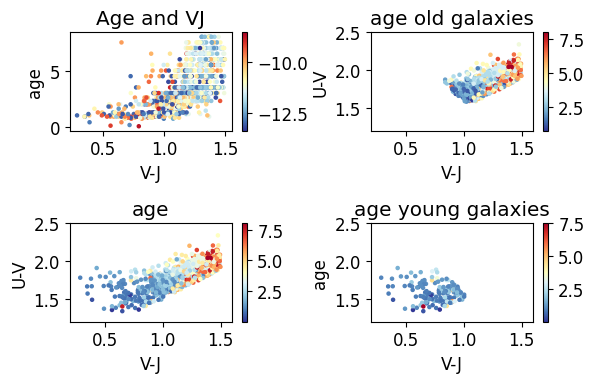

In [32]:
fig,ax1 = plt.subplots(2,2,dpi=100)

im1 = ax1[0][0].scatter(cat["vj"][quiescent_sample],cat["lp_age"][quiescent_sample]/1e9,\
                        c = cat["ssfr"][quiescent_sample],s=5,cmap='RdYlBu_r')
ax1[0][0].set_xlabel("V-J")
ax1[0][0].set_ylabel("age")
ax1[0][0].set_title("Age and VJ")
fig.colorbar(im1, ax=ax1[0][0], orientation='vertical')


im1 = ax1[1][0].scatter(cat["vj"][quiescent_sample],cat["uv"][quiescent_sample],\
                        c = cat["lp_age"][quiescent_sample]/1e9,s=5,cmap='RdYlBu_r')
ax1[1][0].set_xlabel("V-J")
ax1[1][0].set_ylabel("U-V")
ax1[1][0].set_title("age")
ax1[1][0].set_xlim(0.2,1.6)
ax1[1][0].set_ylim(1.2,2.5)
ax1[1][0].set_clim=(0.5,10)

fig.colorbar(im1, ax=ax1[1][0], orientation='vertical')

im1 = ax1[0][1].scatter(cat["vj"][old_quiescent_sample],cat["uv"][old_quiescent_sample],\
                        c = cat["lp_age"][old_quiescent_sample]/1e9,s=5,cmap='RdYlBu_r')
ax1[0][1].set_xlabel("V-J")
ax1[0][1].set_ylabel("U-V")
ax1[0][1].set_title("age old galaxies")
ax1[0][1].set_xlim(0.2,1.6)
ax1[0][1].set_ylim(1.2,2.5)
ax1[0][1].set_clim=(0.5,10)
fig.colorbar(im1, ax=ax1[0][1], orientation='vertical')


im1 = ax1[1][1].scatter(cat["vj"][young_quiescent_sample],cat["uv"][young_quiescent_sample],\
                        c = cat["lp_age"][young_quiescent_sample]/1e9,s=5,cmap='RdYlBu_r')
ax1[1][1].set_xlabel("V-J")
ax1[1][1].set_ylabel("age")
ax1[1][1].set_title("age young galaxies")
ax1[1][1].set_xlim(0.2,1.6)
ax1[1][1].set_ylim(1.2,2.5)
ax1[1][1].set_clim=(0.5,10)
fig.colorbar(im1, ax=ax1[1][1], orientation='vertical')


fig.tight_layout()